In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from datetime import datetime, timedelta
import math
import time

In [ ]:
#read train dataset
df = pd.read_csv("ProblemStatement_Data&Instructions-1616503373207/DataForPHD_Forall/20210322_Traindata/Train.csv")

In [ ]:
df.head()

,FlightNumber,Year,Month,DayofMonth,DayOfWeek,ScheduledDepTime,ScheduledArrTime,ScheduledTravelTime,Origin,Destination,Distance,ActualArrivalTimeStamp
0,BOS_CLE_29089,2004,9,20,1,1000,1154,114,BOS,CLE,563,20/09/04 11:54
1,CLE_ATL_44346,2004,11,19,5,1440,1634,114,CLE,ATL,554,19/11/04 18:55
2,SNA_LAS_44378,2004,5,4,2,1800,1902,62,SNA,LAS,226,04/05/04 19:02
3,CLT_TPA_51502,2004,7,6,2,1400,1533,93,CLT,TPA,508,06/07/04 15:33
4,MSP_ORD_44884,2004,9,23,4,830,946,76,MSP,ORD,334,23/09/04 09:46


In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7861 entries, 0 to 7860
Data columns (total 12 columns):
 #   Column                  Non-Null Count  Dtype 
---  ------                  --------------  ----- 
 0   FlightNumber            7861 non-null   object
 1   Year                    7861 non-null   int64 
 2   Month                   7861 non-null   int64 
 3   DayofMonth              7861 non-null   int64 
 4   DayOfWeek               7861 non-null   int64 
 5   ScheduledDepTime        7861 non-null   int64 
 6   ScheduledArrTime        7861 non-null   int64 
 7   ScheduledTravelTime     7861 non-null   int64 
 8   Origin                  7861 non-null   object
 9   Destination             7861 non-null   object
 10  Distance                7861 non-null   int64 
 11  ActualArrivalTimeStamp  7861 non-null   object
dtypes: int64(8), object(4)
memory usage: 737.1+ KB


In [ ]:
df.nunique()

FlightNumber              7861
Year                         1
Month                        6
DayofMonth                  31
DayOfWeek                    7
ScheduledDepTime           681
ScheduledArrTime           912
ScheduledTravelTime        324
Origin                     223
Destination                215
Distance                   984
ActualArrivalTimeStamp    7594
dtype: int64

In [ ]:
#converting column ScheduledDepTime and ScheduledArrTime into 12 hour time format

def convert_to_time(value):
    time = datetime.strptime(value, '%H%M')
    return time.strftime('%I:%M %p')

df['ScheduledDepTime'] = df['ScheduledDepTime'].astype(str)
df['ScheduledArrTime'] = df['ScheduledArrTime'].astype(str)

df['ScheduledDepTime'] = df['ScheduledDepTime'].apply(convert_to_time)
df['ScheduledArrTime'] = df['ScheduledArrTime'].apply(convert_to_time)

In [ ]:
df.head()

,FlightNumber,Year,Month,DayofMonth,DayOfWeek,ScheduledDepTime,ScheduledArrTime,ScheduledTravelTime,Origin,Destination,Distance,ActualArrivalTimeStamp
0,BOS_CLE_29089,2004,9,20,1,10:00 AM,11:54 AM,114,BOS,CLE,563,20/09/04 11:54
1,CLE_ATL_44346,2004,11,19,5,02:40 PM,04:34 PM,114,CLE,ATL,554,19/11/04 18:55
2,SNA_LAS_44378,2004,5,4,2,06:00 PM,07:02 PM,62,SNA,LAS,226,04/05/04 19:02
3,CLT_TPA_51502,2004,7,6,2,02:00 PM,03:33 PM,93,CLT,TPA,508,06/07/04 15:33
4,MSP_ORD_44884,2004,9,23,4,08:30 AM,09:46 AM,76,MSP,ORD,334,23/09/04 09:46


In [ ]:
#seperating ActualArrivalTimeStamp to date and time

df['ActualArrivalTimeStamp'] = df['ActualArrivalTimeStamp'].apply(lambda x: datetime.strptime(x, '%d/%m/%y %H:%M'))
df['ActualArrivalDate'] = df['ActualArrivalTimeStamp'].apply(lambda x: x.date())
df['ActualArrivalTime'] = df['ActualArrivalTimeStamp'].apply(lambda x: x.time())

In [ ]:
df.head()

,FlightNumber,Year,Month,DayofMonth,DayOfWeek,ScheduledDepTime,ScheduledArrTime,ScheduledTravelTime,Origin,Destination,Distance,ActualArrivalTimeStamp,ActualArrivalDate,ActualArrivalTime
0,BOS_CLE_29089,2004,9,20,1,10:00 AM,11:54 AM,114,BOS,CLE,563,2004-09-20 11:54:00,2004-09-20,11:54:00
1,CLE_ATL_44346,2004,11,19,5,02:40 PM,04:34 PM,114,CLE,ATL,554,2004-11-19 18:55:00,2004-11-19,18:55:00
2,SNA_LAS_44378,2004,5,4,2,06:00 PM,07:02 PM,62,SNA,LAS,226,2004-05-04 19:02:00,2004-05-04,19:02:00
3,CLT_TPA_51502,2004,7,6,2,02:00 PM,03:33 PM,93,CLT,TPA,508,2004-07-06 15:33:00,2004-07-06,15:33:00
4,MSP_ORD_44884,2004,9,23,4,08:30 AM,09:46 AM,76,MSP,ORD,334,2004-09-23 09:46:00,2004-09-23,09:46:00


In [ ]:
#droping ActualArrivalTimeStamp column becase it's no longer required

df = df.drop(['ActualArrivalTimeStamp'], axis = 1)

In [ ]:
df.head()

,FlightNumber,Year,Month,DayofMonth,DayOfWeek,ScheduledDepTime,ScheduledArrTime,ScheduledTravelTime,Origin,Destination,Distance,ActualArrivalDate,ActualArrivalTime
0,BOS_CLE_29089,2004,9,20,1,10:00 AM,11:54 AM,114,BOS,CLE,563,2004-09-20,11:54:00
1,CLE_ATL_44346,2004,11,19,5,02:40 PM,04:34 PM,114,CLE,ATL,554,2004-11-19,18:55:00
2,SNA_LAS_44378,2004,5,4,2,06:00 PM,07:02 PM,62,SNA,LAS,226,2004-05-04,19:02:00
3,CLT_TPA_51502,2004,7,6,2,02:00 PM,03:33 PM,93,CLT,TPA,508,2004-07-06,15:33:00
4,MSP_ORD_44884,2004,9,23,4,08:30 AM,09:46 AM,76,MSP,ORD,334,2004-09-23,09:46:00


In [ ]:
#converting ActualArrivalTime column into 12 hour format

df['ActualArrivalTime'] = df['ActualArrivalTime'].astype(str)
df['ActualArrivalTime'] = df['ActualArrivalTime'].apply(lambda x: datetime.strptime(x, '%H:%M:%S'))
df['ActualArrivalTime'] = df['ActualArrivalTime'].apply(lambda x: x.strftime('%I:%M %p'))

In [ ]:
df.head()

,FlightNumber,Year,Month,DayofMonth,DayOfWeek,ScheduledDepTime,ScheduledArrTime,ScheduledTravelTime,Origin,Destination,Distance,ActualArrivalDate,ActualArrivalTime
0,BOS_CLE_29089,2004,9,20,1,10:00 AM,11:54 AM,114,BOS,CLE,563,2004-09-20,11:54 AM
1,CLE_ATL_44346,2004,11,19,5,02:40 PM,04:34 PM,114,CLE,ATL,554,2004-11-19,06:55 PM
2,SNA_LAS_44378,2004,5,4,2,06:00 PM,07:02 PM,62,SNA,LAS,226,2004-05-04,07:02 PM
3,CLT_TPA_51502,2004,7,6,2,02:00 PM,03:33 PM,93,CLT,TPA,508,2004-07-06,03:33 PM
4,MSP_ORD_44884,2004,9,23,4,08:30 AM,09:46 AM,76,MSP,ORD,334,2004-09-23,09:46 AM


In [ ]:
# Convert to datetime objects
df['start'] = df['ScheduledArrTime'].apply(lambda x: datetime.strptime(x, '%I:%M %p'))
df['end'] = df['ActualArrivalTime'].apply(lambda x: datetime.strptime(x, '%I:%M %p'))

# Calculate time difference in seconds
df['Difference'] = df['end'] - df['start']

In [ ]:
#converting seconds into minutes

df['Difference'] = df['Difference'].apply(lambda x: x / timedelta(minutes=1))

In [ ]:
df.head()

,FlightNumber,Year,Month,DayofMonth,DayOfWeek,ScheduledDepTime,ScheduledArrTime,ScheduledTravelTime,Origin,Destination,Distance,ActualArrivalDate,ActualArrivalTime,start,end,Difference
0,BOS_CLE_29089,2004,9,20,1,10:00 AM,11:54 AM,114,BOS,CLE,563,2004-09-20,11:54 AM,1900-01-01 11:54:00,1900-01-01 11:54:00,0.0
1,CLE_ATL_44346,2004,11,19,5,02:40 PM,04:34 PM,114,CLE,ATL,554,2004-11-19,06:55 PM,1900-01-01 16:34:00,1900-01-01 18:55:00,141.0
2,SNA_LAS_44378,2004,5,4,2,06:00 PM,07:02 PM,62,SNA,LAS,226,2004-05-04,07:02 PM,1900-01-01 19:02:00,1900-01-01 19:02:00,0.0
3,CLT_TPA_51502,2004,7,6,2,02:00 PM,03:33 PM,93,CLT,TPA,508,2004-07-06,03:33 PM,1900-01-01 15:33:00,1900-01-01 15:33:00,0.0
4,MSP_ORD_44884,2004,9,23,4,08:30 AM,09:46 AM,76,MSP,ORD,334,2004-09-23,09:46 AM,1900-01-01 09:46:00,1900-01-01 09:46:00,0.0


In [ ]:
#droping start and end column

df = df.drop(columns=['start', 'end'])

In [ ]:
#converting into int

df['Difference'] = df['Difference'].astype(int)

In [ ]:
df.head()

,FlightNumber,Year,Month,DayofMonth,DayOfWeek,ScheduledDepTime,ScheduledArrTime,ScheduledTravelTime,Origin,Destination,Distance,ActualArrivalDate,ActualArrivalTime,Difference
0,BOS_CLE_29089,2004,9,20,1,10:00 AM,11:54 AM,114,BOS,CLE,563,2004-09-20,11:54 AM,0
1,CLE_ATL_44346,2004,11,19,5,02:40 PM,04:34 PM,114,CLE,ATL,554,2004-11-19,06:55 PM,141
2,SNA_LAS_44378,2004,5,4,2,06:00 PM,07:02 PM,62,SNA,LAS,226,2004-05-04,07:02 PM,0
3,CLT_TPA_51502,2004,7,6,2,02:00 PM,03:33 PM,93,CLT,TPA,508,2004-07-06,03:33 PM,0
4,MSP_ORD_44884,2004,9,23,4,08:30 AM,09:46 AM,76,MSP,ORD,334,2004-09-23,09:46 AM,0


In [ ]:
#deriving Target column FlightDelayStatus if it is delayed more than 15 minutes then it is labeled as 1 else 2

df['FlightDelayStatus'] = df['Difference'].apply(lambda x: 1 if x > 15 else 2)

In [ ]:
df.head(10)

,FlightNumber,Year,Month,DayofMonth,DayOfWeek,ScheduledDepTime,ScheduledArrTime,ScheduledTravelTime,Origin,Destination,Distance,ActualArrivalDate,ActualArrivalTime,Difference,FlightDelayStatus
0,BOS_CLE_29089,2004,9,20,1,10:00 AM,11:54 AM,114,BOS,CLE,563,2004-09-20,11:54 AM,0,2
1,CLE_ATL_44346,2004,11,19,5,02:40 PM,04:34 PM,114,CLE,ATL,554,2004-11-19,06:55 PM,141,1
2,SNA_LAS_44378,2004,5,4,2,06:00 PM,07:02 PM,62,SNA,LAS,226,2004-05-04,07:02 PM,0,2
3,CLT_TPA_51502,2004,7,6,2,02:00 PM,03:33 PM,93,CLT,TPA,508,2004-07-06,03:33 PM,0,2
4,MSP_ORD_44884,2004,9,23,4,08:30 AM,09:46 AM,76,MSP,ORD,334,2004-09-23,09:46 AM,0,2
5,CVG_GRR_45655,2004,9,26,7,05:30 PM,06:32 PM,62,CVG,GRR,268,2004-09-26,06:32 PM,0,2
6,DFW_STL_53369,2004,5,5,3,01:30 PM,03:17 PM,107,DFW,STL,551,2004-05-05,03:17 PM,0,2
7,ACV_SFO_50785,2004,9,15,3,06:55 AM,07:58 AM,63,ACV,SFO,250,2004-09-15,07:58 AM,0,2
8,BHM_DFW_34260,2004,5,28,5,02:25 PM,04:25 PM,120,BHM,DFW,597,2004-05-28,06:39 PM,134,1
9,DFW_PIT_33678,2004,9,11,6,08:47 AM,12:23 PM,156,DFW,PIT,1068,2004-09-11,12:23 PM,0,2


In [ ]:
#getting unique values from origin column

unique_values_col1 = df['Origin'].unique()

In [ ]:
#converting into dataframe and changing it's name to AirportID

df_origin = pd.DataFrame(data = unique_values_col1 ,columns = ['AirportID'])

In [ ]:
df_origin.head()

,AirportID
0,BOS
1,CLE
2,SNA
3,CLT
4,MSP


In [ ]:
#reading AllStation data

df_all_id = pd.read_csv("ProblemStatement_Data&Instructions-1616503373207/DataForPHD_Forall/20210322_weatherdatatoconsider/AllStationsData_PHD.csv")

In [ ]:
df_all_id.columns

Index(['WeatherStationID', 'AirportID', 'GroundHeight', 'StationHeight',
       'BarometerHeight', 'Latitude', 'Longitude', 'TimeZone'],
      dtype='object')

In [ ]:
df_all_id.nunique()

WeatherStationID    1744
AirportID           1744
GroundHeight         720
StationHeight        919
BarometerHeight      730
Latitude            1022
Longitude           1362
TimeZone              12
dtype: int64

In [ ]:
#extracting only requried WeatherStationID

df_origin = pd.merge(df_origin, df_all_id, on=['AirportID', 'AirportID'])

In [ ]:
df_origin.head()

,AirportID,WeatherStationID,GroundHeight,StationHeight,BarometerHeight,Latitude,Longitude,TimeZone
0,BOS,14739,19,30,180,42.22,-71.01,5
1,CLE,14820,802,805,805,41.24,-81.51,5
2,SNA,93184,49,55,52,33.41,-117.52,8
3,CLT,13881,721,769,724,35.13,-80.56,5
4,MSP,14922,871,838,874,44.53,-93.14,6


In [ ]:
df_origin.shape

(223, 8)

In [ ]:
#considering only two columns

df_id = df_origin.loc[:, ['AirportID', 'WeatherStationID']]

In [ ]:
df_id.head()

,AirportID,WeatherStationID
0,BOS,14739
1,CLE,14820
2,SNA,93184
3,CLT,13881
4,MSP,14922


In [ ]:
df_id.shape

(223, 2)

In [ ]:
#reading weather data of all months

df_01 = pd.read_csv("ProblemStatement_Data&Instructions-1616503373207/DataForPHD_Forall/20210322_weatherdatatoconsider/2004/csv/200401hourly.csv")
df_03 = pd.read_csv('ProblemStatement_Data&Instructions-1616503373207/DataForPHD_Forall/20210322_weatherdatatoconsider/2004/csv/200403hourly.csv')
df_05 = pd.read_csv('ProblemStatement_Data&Instructions-1616503373207/DataForPHD_Forall/20210322_weatherdatatoconsider/2004/csv/200405hourly.csv')
df_07 = pd.read_csv('ProblemStatement_Data&Instructions-1616503373207/DataForPHD_Forall/20210322_weatherdatatoconsider/2004/csv/200407hourly.csv')
df_09 = pd.read_csv('ProblemStatement_Data&Instructions-1616503373207/DataForPHD_Forall/20210322_weatherdatatoconsider/2004/csv/200409hourly.csv')
df_11 = pd.read_csv('ProblemStatement_Data&Instructions-1616503373207/DataForPHD_Forall/20210322_weatherdatatoconsider/2004/csv/200411hourly.csv')

C:\Users\chandan\anaconda3\lib\site-packages\IPython\core\interactiveshell.py:3444: DtypeWarning: Columns (8) have mixed types.Specify dtype option on import or set low_memory=False.
  exec(code_obj, self.user_global_ns, self.user_ns)


In [ ]:
df_01.shape

(182999, 12)

In [ ]:
df_01.nunique()

WeatherStationID            1349
YearMonthDay                   4
Time                        1420
SkyConditions              24302
Visibility                    27
DBT                          129
DewPointTemp                 115
RelativeHumidityPercent       96
WindSpeed                     45
WindDirection                 39
WindGustValue                 48
StationPressure              906
dtype: int64

In [ ]:
df_03.nunique()

WeatherStationID             874
YearMonthDay                  31
Time                        1420
SkyConditions              81149
Visibility                    37
DBT                          150
DewPointTemp                 128
RelativeHumidityPercent       98
WindSpeed                    102
WindDirection                 41
WindGustValue                 94
StationPressure              873
dtype: int64

In [ ]:
df_05.nunique()

WeatherStationID             1432
YearMonthDay                   31
Time                         1422
SkyConditions              125736
Visibility                     47
DBT                           134
DewPointTemp                  117
RelativeHumidityPercent        99
WindSpeed                     110
WindDirection                  55
WindGustValue                  84
StationPressure               906
dtype: int64

In [ ]:
df_07.nunique()

WeatherStationID             1431
YearMonthDay                   31
Time                         1425
SkyConditions              102092
Visibility                     51
DBT                            95
DewPointTemp                   99
RelativeHumidityPercent        99
WindSpeed                      98
WindDirection                  46
WindGustValue                  73
StationPressure               884
dtype: int64

In [ ]:
df_09.nunique()

WeatherStationID            1438
YearMonthDay                  30
Time                        1420
SkyConditions              88469
Visibility                    49
DBT                          112
DewPointTemp                 100
RelativeHumidityPercent       98
WindSpeed                    119
WindDirection                 52
WindGustValue                 95
StationPressure              919
dtype: int64

In [ ]:

df_11.nunique()

WeatherStationID            1427
YearMonthDay                  30
Time                        1421
SkyConditions              91424
Visibility                    51
DBT                          139
DewPointTemp                 133
RelativeHumidityPercent       99
WindSpeed                     55
WindDirection                 48
WindGustValue                 80
StationPressure              961
dtype: int64

In [ ]:
#checking number of days in 1st month

df_Month = df[df['Month'] == 1]
df_Month['DayofMonth'].value_counts()

4    73
3    60
2    50
1    47
Name: DayofMonth, dtype: int64

In [ ]:
#concating every months weather data

df_weather = pd.concat([df_01, df_03, df_05, df_07, df_09, df_11], axis=0)

In [ ]:
df_weather.shape

(6485177, 12)

In [ ]:
df_weather.head()

,WeatherStationID,YearMonthDay,Time,SkyConditions,Visibility,DBT,DewPointTemp,RelativeHumidityPercent,WindSpeed,WindDirection,WindGustValue,StationPressure
0,3034,20040101,10,OVC095,10SM,30.0,7.0,38.0,0.0,000,0.0,30.10
1,3035,20040101,10,SCT110,10SM,43.0,18.0,37.0,0.0,000,0.0,30.07
2,3039,20040101,10,OVC002,0.25SM,14.0,12.0,92.0,0.0,000,0.0,30.01
3,3040,20040101,10,CLR,10SM,30.0,21.0,69.0,9.0,250,0.0,29.82
4,4128,20040101,10,BKN001 BKN010 OVC024,4SM,NaN,NaN,NaN,0.0,000,0.0,29.80


In [ ]:
df_weather.nunique()

WeatherStationID             1447
YearMonthDay                  157
Time                         1428
SkyConditions              247019
Visibility                     73
DBT                           170
DewPointTemp                  140
RelativeHumidityPercent        99
WindSpeed                     129
WindDirection                  83
WindGustValue                 141
StationPressure              1006
dtype: int64

In [ ]:
#extracting only required WeatherStationID from weather data

df_weather_common = pd.merge(df_id, df_weather, on=['WeatherStationID', 'WeatherStationID'], how = 'left')

In [ ]:
df_weather_common.shape

(987842, 13)

In [ ]:
df_weather_common.head()

,AirportID,WeatherStationID,YearMonthDay,Time,SkyConditions,Visibility,DBT,DewPointTemp,RelativeHumidityPercent,WindSpeed,WindDirection,WindGustValue,StationPressure
0,BOS,14739,20040101,1054,SCT050,10SM,42.0,22.0,45.0,11.0,270,0.0,30.18
1,BOS,14739,20040101,1154,BKN050,10SM,42.0,21.0,43.0,15.0,300,20.0,30.17
2,BOS,14739,20040101,1254,BKN050,10SM,42.0,21.0,43.0,14.0,280,22.0,30.18
3,BOS,14739,20040101,1354,BKN050,10SM,42.0,21.0,43.0,16.0,280,22.0,30.18
4,BOS,14739,20040101,1454,SCT050 SCT150,10SM,43.0,21.0,42.0,13.0,320,0.0,30.20


In [ ]:
df_weather_common.isnull().sum()

AirportID                       0
WeatherStationID                0
YearMonthDay                    0
Time                            0
SkyConditions                1582
Visibility                   1189
DBT                        169163
DewPointTemp               169466
RelativeHumidityPercent    169989
WindSpeed                     955
WindDirection                 953
WindGustValue                 955
StationPressure            168151
dtype: int64

In [ ]:
df_new_com = df_weather_common.copy()

In [ ]:
df_new_com.head()

,AirportID,WeatherStationID,YearMonthDay,Time,SkyConditions,Visibility,DBT,DewPointTemp,RelativeHumidityPercent,WindSpeed,WindDirection,WindGustValue,StationPressure
0,BOS,14739,20040101,1054,SCT050,10SM,42.0,22.0,45.0,11.0,270,0.0,30.18
1,BOS,14739,20040101,1154,BKN050,10SM,42.0,21.0,43.0,15.0,300,20.0,30.17
2,BOS,14739,20040101,1254,BKN050,10SM,42.0,21.0,43.0,14.0,280,22.0,30.18
3,BOS,14739,20040101,1354,BKN050,10SM,42.0,21.0,43.0,16.0,280,22.0,30.18
4,BOS,14739,20040101,1454,SCT050 SCT150,10SM,43.0,21.0,42.0,13.0,320,0.0,30.20


In [ ]:
df_new_com.shape

(987842, 13)

In [ ]:
#converting Time column into 12 hour time format

df_new_com['Time'] = df_new_com['Time'].astype(str)
df_new_com['Time'] = df_new_com['Time'].apply(convert_to_time)

In [ ]:
df_new_com.head()

,AirportID,WeatherStationID,YearMonthDay,Time,SkyConditions,Visibility,DBT,DewPointTemp,RelativeHumidityPercent,WindSpeed,WindDirection,WindGustValue,StationPressure
0,BOS,14739,20040101,10:54 AM,SCT050,10SM,42.0,22.0,45.0,11.0,270,0.0,30.18
1,BOS,14739,20040101,11:54 AM,BKN050,10SM,42.0,21.0,43.0,15.0,300,20.0,30.17
2,BOS,14739,20040101,12:54 PM,BKN050,10SM,42.0,21.0,43.0,14.0,280,22.0,30.18
3,BOS,14739,20040101,01:54 PM,BKN050,10SM,42.0,21.0,43.0,16.0,280,22.0,30.18
4,BOS,14739,20040101,02:54 PM,SCT050 SCT150,10SM,43.0,21.0,42.0,13.0,320,0.0,30.20


In [ ]:
#converting YearMonthDay column into year month and day

df_new_com['YearMonthDay'] = pd.to_datetime(df_new_com['YearMonthDay'], format='%Y%m%d')
df_new_com['Year'] = df_new_com['YearMonthDay'].dt.year
df_new_com['Month'] = df_new_com['YearMonthDay'].dt.month
df_new_com['DayofMonth'] = df_new_com['YearMonthDay'].dt.day

In [ ]:
df_new_com.head()

,AirportID,WeatherStationID,YearMonthDay,Time,SkyConditions,Visibility,DBT,DewPointTemp,RelativeHumidityPercent,WindSpeed,WindDirection,WindGustValue,StationPressure,Year,Month,DayofMonth
0,BOS,14739,2004-01-01,10:54 AM,SCT050,10SM,42.0,22.0,45.0,11.0,270,0.0,30.18,2004,1,1
1,BOS,14739,2004-01-01,11:54 AM,BKN050,10SM,42.0,21.0,43.0,15.0,300,20.0,30.17,2004,1,1
2,BOS,14739,2004-01-01,12:54 PM,BKN050,10SM,42.0,21.0,43.0,14.0,280,22.0,30.18,2004,1,1
3,BOS,14739,2004-01-01,01:54 PM,BKN050,10SM,42.0,21.0,43.0,16.0,280,22.0,30.18,2004,1,1
4,BOS,14739,2004-01-01,02:54 PM,SCT050 SCT150,10SM,43.0,21.0,42.0,13.0,320,0.0,30.20,2004,1,1


In [ ]:
df_new_com.shape

(987842, 16)

In [ ]:
#droping column YearMonthDay column

df_new_com = df_new_com.drop(['YearMonthDay'], axis = 1)

In [ ]:
#renaming column so that it helps in merging train and weather dataset

df_new_com = df_new_com.rename(columns = {'AirportID' : 'Origin'})
df_new_com = df_new_com.rename(columns = {'Time' : 'ScheduledDepTime'})

In [ ]:
df_new_com.head()

,Origin,WeatherStationID,ScheduledDepTime,SkyConditions,Visibility,DBT,DewPointTemp,RelativeHumidityPercent,WindSpeed,WindDirection,WindGustValue,StationPressure,Year,Month,DayofMonth
0,BOS,14739,10:54 AM,SCT050,10SM,42.0,22.0,45.0,11.0,270,0.0,30.18,2004,1,1
1,BOS,14739,11:54 AM,BKN050,10SM,42.0,21.0,43.0,15.0,300,20.0,30.17,2004,1,1
2,BOS,14739,12:54 PM,BKN050,10SM,42.0,21.0,43.0,14.0,280,22.0,30.18,2004,1,1
3,BOS,14739,01:54 PM,BKN050,10SM,42.0,21.0,43.0,16.0,280,22.0,30.18,2004,1,1
4,BOS,14739,02:54 PM,SCT050 SCT150,10SM,43.0,21.0,42.0,13.0,320,0.0,30.20,2004,1,1


In [ ]:
df_test = df.copy()

In [ ]:
#converting into string

df_new_com['ScheduledDepTime'] = df_new_com['ScheduledDepTime'].astype(str)

In [ ]:
# Convert the 'ScheduledDepTime' column to datetime format
df_new_com['timehour'] = pd.to_datetime(df_new_com['ScheduledDepTime'], format='%I:%M %p')

# Create a new column with the hour and minute values of 'ScheduledDepTime'
df_new_com['timehour'] = df_new_com['timehour'].dt.strftime('%H:%M')

#repeating same steps for train dataset
df_test['timehour'] = pd.to_datetime(df_test['ScheduledDepTime'], format='%I:%M %p')
df_test['timehour'] = df_test['timehour'].dt.strftime('%H:%M')


In [ ]:
df_new_com.head()

,Origin,WeatherStationID,ScheduledDepTime,SkyConditions,Visibility,DBT,DewPointTemp,RelativeHumidityPercent,WindSpeed,WindDirection,WindGustValue,StationPressure,Year,Month,DayofMonth,timehour
0,BOS,14739,10:54 AM,SCT050,10SM,42.0,22.0,45.0,11.0,270,0.0,30.18,2004,1,1,10:54
1,BOS,14739,11:54 AM,BKN050,10SM,42.0,21.0,43.0,15.0,300,20.0,30.17,2004,1,1,11:54
2,BOS,14739,12:54 PM,BKN050,10SM,42.0,21.0,43.0,14.0,280,22.0,30.18,2004,1,1,12:54
3,BOS,14739,01:54 PM,BKN050,10SM,42.0,21.0,43.0,16.0,280,22.0,30.18,2004,1,1,13:54
4,BOS,14739,02:54 PM,SCT050 SCT150,10SM,43.0,21.0,42.0,13.0,320,0.0,30.20,2004,1,1,14:54


In [ ]:
df_new_com.shape

(987842, 16)

In [ ]:
df_test.shape

(7861, 16)

In [ ]:
df_test.head()

,FlightNumber,Year,Month,DayofMonth,DayOfWeek,ScheduledDepTime,ScheduledArrTime,ScheduledTravelTime,Origin,Destination,Distance,ActualArrivalDate,ActualArrivalTime,Difference,FlightDelayStatus,timehour
0,BOS_CLE_29089,2004,9,20,1,10:00 AM,11:54 AM,114,BOS,CLE,563,2004-09-20,11:54 AM,0,2,10:00
1,CLE_ATL_44346,2004,11,19,5,02:40 PM,04:34 PM,114,CLE,ATL,554,2004-11-19,06:55 PM,141,1,14:40
2,SNA_LAS_44378,2004,5,4,2,06:00 PM,07:02 PM,62,SNA,LAS,226,2004-05-04,07:02 PM,0,2,18:00
3,CLT_TPA_51502,2004,7,6,2,02:00 PM,03:33 PM,93,CLT,TPA,508,2004-07-06,03:33 PM,0,2,14:00
4,MSP_ORD_44884,2004,9,23,4,08:30 AM,09:46 AM,76,MSP,ORD,334,2004-09-23,09:46 AM,0,2,08:30


In [ ]:
# Define a custom function to convert the time values
def convert_time(time):
    # Split the time value into hours and minutes
    hours, minutes = map(int, time.split(':'))

    # If the minutes are 30 or less, round down to the previous hour
    if minutes <= 30:
        return hours
    # If the minutes are more than 30, round up to the next hour
    else:
        return hours + 1

# Apply the custom function to the 'timehour' column using the apply() method
df_new_com['time_hours'] = df_new_com['timehour'].apply(convert_time)
df_test['time_hours'] = df_test['timehour'].apply(convert_time)

In [ ]:
df_test.head()

,FlightNumber,Year,Month,DayofMonth,DayOfWeek,ScheduledDepTime,ScheduledArrTime,ScheduledTravelTime,Origin,Destination,Distance,ActualArrivalDate,ActualArrivalTime,Difference,FlightDelayStatus,timehour,time_hours
0,BOS_CLE_29089,2004,9,20,1,10:00 AM,11:54 AM,114,BOS,CLE,563,2004-09-20,11:54 AM,0,2,10:00,10
1,CLE_ATL_44346,2004,11,19,5,02:40 PM,04:34 PM,114,CLE,ATL,554,2004-11-19,06:55 PM,141,1,14:40,15
2,SNA_LAS_44378,2004,5,4,2,06:00 PM,07:02 PM,62,SNA,LAS,226,2004-05-04,07:02 PM,0,2,18:00,18
3,CLT_TPA_51502,2004,7,6,2,02:00 PM,03:33 PM,93,CLT,TPA,508,2004-07-06,03:33 PM,0,2,14:00,14
4,MSP_ORD_44884,2004,9,23,4,08:30 AM,09:46 AM,76,MSP,ORD,334,2004-09-23,09:46 AM,0,2,08:30,8


In [ ]:
#droping unwanted columns

df_test = df_test.drop(['ActualArrivalDate', 'ActualArrivalTime','Difference', 'timehour'], axis = 1)

In [ ]:
# Convert the column to datetime format
df_test['ScheduledDepTime'] = pd.to_datetime(df_test['ScheduledDepTime'], format='%I:%M %p')
df_test['ScheduledArrTime'] = pd.to_datetime(df_test['ScheduledArrTime'], format='%I:%M %p')

# Create a new column with the hour and minute values of 'ScheduledDepTime'
df_test['ScheduledDepTime'] = df_test['ScheduledDepTime'].dt.strftime('%H:%M')
df_test['ScheduledArrTime'] = df_test['ScheduledArrTime'].dt.strftime('%H:%M')

#converting into string
df_test['ScheduledDepTime'] = df_test['ScheduledDepTime'].astype(str)
df_test['ScheduledArrTime'] = df_test['ScheduledArrTime'].astype(str)

#seperating hour and minutes into respected column
df_test['ScheduledDepTime_Hour'] = df_test.ScheduledDepTime.str[0:2]
df_test['ScheduledDepTime_minutes'] = df_test.ScheduledDepTime.str[3:]
df_test['ScheduledArrTime_Hour'] = df_test.ScheduledArrTime.str[0:2]
df_test['ScheduledArrTime_minutes'] = df_test.ScheduledArrTime.str[3:]

#converting into integer
df_test['ScheduledDepTime_Hour'] = df_test['ScheduledDepTime_Hour'].astype(int)
df_test['ScheduledDepTime_minutes'] = df_test['ScheduledDepTime_minutes'].astype(int)
df_test['ScheduledArrTime_Hour'] = df_test['ScheduledArrTime_Hour'].astype(int)
df_test['ScheduledArrTime_minutes'] = df_test['ScheduledArrTime_minutes'].astype(int)


#droping columns
df_test.drop(columns = ['ScheduledDepTime', 'ScheduledArrTime'], inplace = True)




In [ ]:
df_test.head()

,FlightNumber,Year,Month,DayofMonth,DayOfWeek,ScheduledTravelTime,Origin,Destination,Distance,FlightDelayStatus,time_hours,ScheduledDepTime_Hour,ScheduledDepTime_minutes,ScheduledArrTime_Hour,ScheduledArrTime_minutes
0,BOS_CLE_29089,2004,9,20,1,114,BOS,CLE,563,2,10,10,0,11,54
1,CLE_ATL_44346,2004,11,19,5,114,CLE,ATL,554,1,15,14,40,16,34
2,SNA_LAS_44378,2004,5,4,2,62,SNA,LAS,226,2,18,18,0,19,2
3,CLT_TPA_51502,2004,7,6,2,93,CLT,TPA,508,2,14,14,0,15,33
4,MSP_ORD_44884,2004,9,23,4,76,MSP,ORD,334,2,8,8,30,9,46


In [ ]:
df_new_com.head()

,Origin,WeatherStationID,ScheduledDepTime,SkyConditions,Visibility,DBT,DewPointTemp,RelativeHumidityPercent,WindSpeed,WindDirection,WindGustValue,StationPressure,Year,Month,DayofMonth,timehour,time_hours
0,BOS,14739,10:54 AM,SCT050,10SM,42.0,22.0,45.0,11.0,270,0.0,30.18,2004,1,1,10:54,11
1,BOS,14739,11:54 AM,BKN050,10SM,42.0,21.0,43.0,15.0,300,20.0,30.17,2004,1,1,11:54,12
2,BOS,14739,12:54 PM,BKN050,10SM,42.0,21.0,43.0,14.0,280,22.0,30.18,2004,1,1,12:54,13
3,BOS,14739,01:54 PM,BKN050,10SM,42.0,21.0,43.0,16.0,280,22.0,30.18,2004,1,1,13:54,14
4,BOS,14739,02:54 PM,SCT050 SCT150,10SM,43.0,21.0,42.0,13.0,320,0.0,30.20,2004,1,1,14:54,15


In [ ]:
#droping column

df_new_com = df_new_com.drop(['timehour'], axis =1)

In [ ]:
# Convert the 'ScheduledDepTime' column to datetime format
df_new_com['ScheduledDepTime'] = pd.to_datetime(df_new_com['ScheduledDepTime'], format='%I:%M %p')

# df_new_com a new column with the hour and minute values of 'ScheduledDepTime'
df_new_com['ScheduledDepTime'] = df_new_com['ScheduledDepTime'].dt.strftime('%H:%M')

#Convert into string
df_new_com['ScheduledDepTime'] = df_new_com['ScheduledDepTime'].astype(str)


#seperating hour and minutes into respected column
df_new_com['weather_Dep_Hour'] = df_new_com.ScheduledDepTime.str[0:2]
df_new_com['weather_Dep_minutes'] = df_new_com.ScheduledDepTime.str[3:]

#converting into integer
df_new_com['weather_Dep_Hour'] = df_new_com['weather_Dep_Hour'].astype(int)
df_new_com['weather_Dep_minutes'] = df_new_com['weather_Dep_minutes'].astype(int)

#droping the column
df_new_com.drop(columns = ['ScheduledDepTime'], inplace = True)

In [ ]:
df_new_com.head()

,Origin,WeatherStationID,SkyConditions,Visibility,DBT,DewPointTemp,RelativeHumidityPercent,WindSpeed,WindDirection,WindGustValue,StationPressure,Year,Month,DayofMonth,time_hours,weather_Dep_Hour,weather_Dep_minutes
0,BOS,14739,SCT050,10SM,42.0,22.0,45.0,11.0,270,0.0,30.18,2004,1,1,11,10,54
1,BOS,14739,BKN050,10SM,42.0,21.0,43.0,15.0,300,20.0,30.17,2004,1,1,12,11,54
2,BOS,14739,BKN050,10SM,42.0,21.0,43.0,14.0,280,22.0,30.18,2004,1,1,13,12,54
3,BOS,14739,BKN050,10SM,42.0,21.0,43.0,16.0,280,22.0,30.18,2004,1,1,14,13,54
4,BOS,14739,SCT050 SCT150,10SM,43.0,21.0,42.0,13.0,320,0.0,30.20,2004,1,1,15,14,54


In [ ]:
df_new_com.shape

(987842, 17)

In [ ]:
df_test.shape

(7861, 15)

In [ ]:
#droping duplicates based on the column needed to be merged

df_date = df_new_com.drop_duplicates(subset=['Origin','Year', 'Month', 'DayofMonth', 'time_hours'])

In [ ]:
df_date.shape

(737078, 17)

In [ ]:
#merging the columns based on certain columns of train and weather dataset

df_merged = pd.merge(df_test, df_date, on=['Origin', 'Year', 'Month', 'DayofMonth', 'time_hours'], how = 'left')

In [ ]:
df_merged.head()

,FlightNumber,Year,Month,DayofMonth,DayOfWeek,ScheduledTravelTime,Origin,Destination,Distance,FlightDelayStatus,...,Visibility,DBT,DewPointTemp,RelativeHumidityPercent,WindSpeed,WindDirection,WindGustValue,StationPressure,weather_Dep_Hour,weather_Dep_minutes
0,BOS_CLE_29089,2004,9,20,1,114,BOS,CLE,563,2,...,10SM,61.0,41.0,48.0,8,030,0.0,30.31,9.0,54.0
1,CLE_ATL_44346,2004,11,19,5,114,CLE,ATL,554,1,...,6SM,53.0,50.0,89.0,7.0,110,0.0,29.21,14.0,51.0
2,SNA_LAS_44378,2004,5,4,2,62,SNA,LAS,226,2,...,9SM,72.0,56.0,57.0,6.0,210,0.0,29.81,17.0,53.0
3,CLT_TPA_51502,2004,7,6,2,93,CLT,TPA,508,2,...,10SM,91.0,68.0,47.0,8.0,350,0.0,29.29,13.0,51.0
4,MSP_ORD_44884,2004,9,23,4,76,MSP,ORD,334,2,...,9SM,65.0,57.0,76.0,5.0,130,0.0,29.05,7.0,53.0


In [ ]:
df_merged.shape

(7861, 27)

In [ ]:
df_merged.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 7861 entries, 0 to 7860
Data columns (total 27 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   FlightNumber              7861 non-null   object 
 1   Year                      7861 non-null   int64  
 2   Month                     7861 non-null   int64  
 3   DayofMonth                7861 non-null   int64  
 4   DayOfWeek                 7861 non-null   int64  
 5   ScheduledTravelTime       7861 non-null   int64  
 6   Origin                    7861 non-null   object 
 7   Destination               7861 non-null   object 
 8   Distance                  7861 non-null   int64  
 9   FlightDelayStatus         7861 non-null   int64  
 10  time_hours                7861 non-null   int64  
 11  ScheduledDepTime_Hour     7861 non-null   int32  
 12  ScheduledDepTime_minutes  7861 non-null   int32  
 13  ScheduledArrTime_Hour     7861 non-null   int32  
 14  Schedule

In [ ]:
df_merged.nunique()

FlightNumber                7861
Year                           1
Month                          6
DayofMonth                    31
DayOfWeek                      7
ScheduledTravelTime          324
Origin                       223
Destination                  215
Distance                     984
FlightDelayStatus              2
time_hours                    17
ScheduledDepTime_Hour         17
ScheduledDepTime_minutes      60
ScheduledArrTime_Hour         19
ScheduledArrTime_minutes      60
WeatherStationID             223
SkyConditions               3510
Visibility                    20
DBT                           95
DewPointTemp                  82
RelativeHumidityPercent       93
WindSpeed                     60
WindDirection                 38
WindGustValue                 33
StationPressure              505
weather_Dep_Hour              17
weather_Dep_minutes           52
dtype: int64

In [ ]:
df_merged.isnull().sum()

FlightNumber                  0
Year                          0
Month                         0
DayofMonth                    0
DayOfWeek                     0
ScheduledTravelTime           0
Origin                        0
Destination                   0
Distance                      0
FlightDelayStatus             0
time_hours                    0
ScheduledDepTime_Hour         0
ScheduledDepTime_minutes      0
ScheduledArrTime_Hour         0
ScheduledArrTime_minutes      0
WeatherStationID             87
SkyConditions                92
Visibility                   89
DBT                         786
DewPointTemp                787
RelativeHumidityPercent     787
WindSpeed                    89
WindDirection                89
WindGustValue                89
StationPressure             781
weather_Dep_Hour             87
weather_Dep_minutes          87
dtype: int64

# Destination

Deriving  weather data and merging on train data based on destination

In [ ]:
df_des = df.copy()

In [ ]:
df_des.head()

,FlightNumber,Year,Month,DayofMonth,DayOfWeek,ScheduledDepTime,ScheduledArrTime,ScheduledTravelTime,Origin,Destination,Distance,ActualArrivalDate,ActualArrivalTime,Difference,FlightDelayStatus
0,BOS_CLE_29089,2004,9,20,1,10:00 AM,11:54 AM,114,BOS,CLE,563,2004-09-20,11:54 AM,0,2
1,CLE_ATL_44346,2004,11,19,5,02:40 PM,04:34 PM,114,CLE,ATL,554,2004-11-19,06:55 PM,141,1
2,SNA_LAS_44378,2004,5,4,2,06:00 PM,07:02 PM,62,SNA,LAS,226,2004-05-04,07:02 PM,0,2
3,CLT_TPA_51502,2004,7,6,2,02:00 PM,03:33 PM,93,CLT,TPA,508,2004-07-06,03:33 PM,0,2
4,MSP_ORD_44884,2004,9,23,4,08:30 AM,09:46 AM,76,MSP,ORD,334,2004-09-23,09:46 AM,0,2


In [ ]:
# Convert the 'ScheduledDepTime' column to datetime format
df_des['time_hours'] = pd.to_datetime(df_des['ScheduledArrTime'], format='%I:%M %p')

# Create a new column with the hour values of 'ScheduledDepTime'
df_des['time_hours'] = df_des['time_hours'].dt.strftime('%H')

In [ ]:
df_des.head()

,FlightNumber,Year,Month,DayofMonth,DayOfWeek,ScheduledDepTime,ScheduledArrTime,ScheduledTravelTime,Origin,Destination,Distance,ActualArrivalDate,ActualArrivalTime,Difference,FlightDelayStatus,time_hours
0,BOS_CLE_29089,2004,9,20,1,10:00 AM,11:54 AM,114,BOS,CLE,563,2004-09-20,11:54 AM,0,2,11
1,CLE_ATL_44346,2004,11,19,5,02:40 PM,04:34 PM,114,CLE,ATL,554,2004-11-19,06:55 PM,141,1,16
2,SNA_LAS_44378,2004,5,4,2,06:00 PM,07:02 PM,62,SNA,LAS,226,2004-05-04,07:02 PM,0,2,19
3,CLT_TPA_51502,2004,7,6,2,02:00 PM,03:33 PM,93,CLT,TPA,508,2004-07-06,03:33 PM,0,2,15
4,MSP_ORD_44884,2004,9,23,4,08:30 AM,09:46 AM,76,MSP,ORD,334,2004-09-23,09:46 AM,0,2,09


In [ ]:
#extracting unique values

unique_values_col_des = df_des['Destination'].unique()

In [ ]:
#converting into dataframe and changing the column name

df_des_des = pd.DataFrame(data = unique_values_col_des ,columns = ['AirportID'])

In [ ]:
df_des_des

,AirportID
0,CLE
1,ATL
2,LAS
3,TPA
4,ORD
...,...
210,SCC
211,EGE
212,ILM
213,TRI


In [ ]:
unique_values_col_des.shape

(215,)

In [ ]:
#extracting only required weather stations for destination from all weather station

df_des_des = pd.merge(df_des_des, df_all_id, on=['AirportID', 'AirportID'])

In [ ]:
df_des_des.shape

(215, 8)

In [ ]:
df_des_des.head()

,AirportID,WeatherStationID,GroundHeight,StationHeight,BarometerHeight,Latitude,Longitude,TimeZone
0,CLE,14820,802,805,805,41.24,-81.51,5
1,ATL,13874,971,1026,974,33.38,-84.26,5
2,LAS,23169,2127,2180,2091,36.05,-115.10,8
3,TPA,12842,8,11,40,27.58,-82.32,5
4,ORD,94846,655,674,658,41.59,-87.55,6


In [ ]:
#extracting only two columns

df_id_des = df_des_des.loc[:, ['AirportID', 'WeatherStationID']]

In [ ]:
df_id_des.head()

,AirportID,WeatherStationID
0,CLE,14820
1,ATL,13874
2,LAS,23169
3,TPA,12842
4,ORD,94846


In [ ]:
#getting only required weather station's data

df_weather_common_des = pd.merge(df_id_des, df_weather, on=['WeatherStationID', 'WeatherStationID'])

In [ ]:
df_weather_common_des.shape

(955827, 13)

In [ ]:
df_weather_common_des.head()

,AirportID,WeatherStationID,YearMonthDay,Time,SkyConditions,Visibility,DBT,DewPointTemp,RelativeHumidityPercent,WindSpeed,WindDirection,WindGustValue,StationPressure
0,CLE,14820,20040101,1051,BKN250,10SM,34.0,24.0,67.0,0.0,000,0.0,29.54
1,CLE,14820,20040101,1151,BKN200,10SM,37.0,24.0,60.0,6.0,160,0.0,29.50
2,CLE,14820,20040101,1251,FEW180 BKN250,10SM,41.0,22.0,47.0,5.0,210,0.0,29.46
3,CLE,14820,20040101,1351,FEW180 BKN250,10SM,44.0,24.0,45.0,5.0,150,0.0,29.42
4,CLE,14820,20040101,1451,SCT110 BKN250,10SM,44.0,25.0,47.0,8.0,150,0.0,29.40


In [ ]:
df_com_des = df_weather_common_des.copy()

In [ ]:
#converting into time format
df_com_des['Time'] = df_com_des['Time'].astype(str)
df_com_des['Time'] = df_com_des['Time'].apply(convert_to_time)

In [ ]:
#seperating year, month and day

df_com_des['YearMonthDay'] = pd.to_datetime(df_com_des['YearMonthDay'], format='%Y%m%d')
df_com_des['Year'] = df_com_des['YearMonthDay'].dt.year
df_com_des['Month'] = df_com_des['YearMonthDay'].dt.month
df_com_des['DayofMonth'] =df_com_des['YearMonthDay'].dt.day

In [ ]:
df_com_des.head()

,AirportID,WeatherStationID,YearMonthDay,Time,SkyConditions,Visibility,DBT,DewPointTemp,RelativeHumidityPercent,WindSpeed,WindDirection,WindGustValue,StationPressure,Year,Month,DayofMonth
0,CLE,14820,2004-01-01,10:51 AM,BKN250,10SM,34.0,24.0,67.0,0.0,000,0.0,29.54,2004,1,1
1,CLE,14820,2004-01-01,11:51 AM,BKN200,10SM,37.0,24.0,60.0,6.0,160,0.0,29.50,2004,1,1
2,CLE,14820,2004-01-01,12:51 PM,FEW180 BKN250,10SM,41.0,22.0,47.0,5.0,210,0.0,29.46,2004,1,1
3,CLE,14820,2004-01-01,01:51 PM,FEW180 BKN250,10SM,44.0,24.0,45.0,5.0,150,0.0,29.42,2004,1,1
4,CLE,14820,2004-01-01,02:51 PM,SCT110 BKN250,10SM,44.0,25.0,47.0,8.0,150,0.0,29.40,2004,1,1


In [ ]:
#droping and renaming column

df_com_des = df_com_des.drop(['YearMonthDay'], axis =1)
df_com_des = df_com_des.rename(columns = {'AirportID' : 'Destination'})

In [ ]:
df_com_des.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 955827 entries, 0 to 955826
Data columns (total 15 columns):
 #   Column                   Non-Null Count   Dtype  
---  ------                   --------------   -----  
 0   Destination              955827 non-null  object 
 1   WeatherStationID         955827 non-null  int64  
 2   Time                     955827 non-null  object 
 3   SkyConditions            954559 non-null  object 
 4   Visibility               954917 non-null  object 
 5   DBT                      790470 non-null  float64
 6   DewPointTemp             789925 non-null  float64
 7   RelativeHumidityPercent  789507 non-null  float64
 8   WindSpeed                954914 non-null  object 
 9   WindDirection            954916 non-null  object 
 10  WindGustValue            954914 non-null  float64
 11  StationPressure          791432 non-null  float64
 12  Year                     955827 non-null  int64  
 13  Month                    955827 non-null  int64  
 14  Dayo

In [ ]:
# Convert the 'ScheduledDepTime' column to datetime format
df_com_des['time_hours'] = pd.to_datetime(df_com_des['Time'], format='%I:%M %p')
df_com_des['time_hours'] = df_com_des['time_hours'].dt.strftime('%H:%M')

#extracting only hours
df_com_des['time_hours'] =df_com_des.time_hours.str[0:2]

In [ ]:
df_com_des.head()

,Destination,WeatherStationID,Time,SkyConditions,Visibility,DBT,DewPointTemp,RelativeHumidityPercent,WindSpeed,WindDirection,WindGustValue,StationPressure,Year,Month,DayofMonth,time_hours
0,CLE,14820,10:51 AM,BKN250,10SM,34.0,24.0,67.0,0.0,000,0.0,29.54,2004,1,1,10
1,CLE,14820,11:51 AM,BKN200,10SM,37.0,24.0,60.0,6.0,160,0.0,29.50,2004,1,1,11
2,CLE,14820,12:51 PM,FEW180 BKN250,10SM,41.0,22.0,47.0,5.0,210,0.0,29.46,2004,1,1,12
3,CLE,14820,01:51 PM,FEW180 BKN250,10SM,44.0,24.0,45.0,5.0,150,0.0,29.42,2004,1,1,13
4,CLE,14820,02:51 PM,SCT110 BKN250,10SM,44.0,25.0,47.0,8.0,150,0.0,29.40,2004,1,1,14


In [ ]:
# Convert the 'ScheduledDepTime' column to datetime format
df_com_des['Time'] = pd.to_datetime(df_com_des['Time'], format='%I:%M %p')

# df_new_com a new column with the hour and minute values of 'ScheduledDepTime'
df_com_des['Time'] = df_com_des['Time'].dt.strftime('%H:%M')

#converting into string
df_com_des['Time'] = df_com_des['Time'].astype(str)

#seperating hour and minutes into individual columns
df_com_des['weather_Arr_Hour'] = df_com_des.Time.str[0:2]
df_com_des['weather_Arr_minutes'] = df_com_des.Time.str[3:]

#converting them into integer
df_com_des['weather_Arr_Hour'] = df_com_des['weather_Arr_Hour'].astype(int)
df_com_des['weather_Arr_minutes'] = df_com_des['weather_Arr_minutes'].astype(int)

#droping the column since time and minutes are seperated and converted ito individual columns
df_com_des.drop(columns = ['Time'], inplace = True)

In [ ]:
df_com_des.head()

,Destination,WeatherStationID,SkyConditions,Visibility,DBT,DewPointTemp,RelativeHumidityPercent,WindSpeed,WindDirection,WindGustValue,StationPressure,Year,Month,DayofMonth,time_hours,weather_Arr_Hour,weather_Arr_minutes
0,CLE,14820,BKN250,10SM,34.0,24.0,67.0,0.0,000,0.0,29.54,2004,1,1,10,10,51
1,CLE,14820,BKN200,10SM,37.0,24.0,60.0,6.0,160,0.0,29.50,2004,1,1,11,11,51
2,CLE,14820,FEW180 BKN250,10SM,41.0,22.0,47.0,5.0,210,0.0,29.46,2004,1,1,12,12,51
3,CLE,14820,FEW180 BKN250,10SM,44.0,24.0,45.0,5.0,150,0.0,29.42,2004,1,1,13,13,51
4,CLE,14820,SCT110 BKN250,10SM,44.0,25.0,47.0,8.0,150,0.0,29.40,2004,1,1,14,14,51


In [ ]:
#droping duplicate columns based on column needed to merge
df_date_des = df_com_des.drop_duplicates(subset=['Destination', 'Year', 'Month', 'DayofMonth', 'time_hours'])

In [ ]:
df_date_des.shape

(711197, 17)

In [ ]:
#merging train and weather(including destination information) dataset
df_merged_des = pd.merge(df_des, df_date_des, on=['Destination', 'Year', 'Month', 'DayofMonth', 'time_hours'], how = 'left')

In [ ]:
df_merged_des.shape

(7861, 28)

In [ ]:
df_merged_des.isnull().sum()

FlightNumber                  0
Year                          0
Month                         0
DayofMonth                    0
DayOfWeek                     0
ScheduledDepTime              0
ScheduledArrTime              0
ScheduledTravelTime           0
Origin                        0
Destination                   0
Distance                      0
ActualArrivalDate             0
ActualArrivalTime             0
Difference                    0
FlightDelayStatus             0
time_hours                    0
WeatherStationID             87
SkyConditions                90
Visibility                   90
DBT                        1082
DewPointTemp               1083
RelativeHumidityPercent    1086
WindSpeed                    88
WindDirection                88
WindGustValue                88
StationPressure            1083
weather_Arr_Hour             87
weather_Arr_minutes          87
dtype: int64

In [ ]:
df_merged_des.head()

,FlightNumber,Year,Month,DayofMonth,DayOfWeek,ScheduledDepTime,ScheduledArrTime,ScheduledTravelTime,Origin,Destination,...,Visibility,DBT,DewPointTemp,RelativeHumidityPercent,WindSpeed,WindDirection,WindGustValue,StationPressure,weather_Arr_Hour,weather_Arr_minutes
0,BOS_CLE_29089,2004,9,20,1,10:00 AM,11:54 AM,114,BOS,CLE,...,10SM,71.0,35.0,27.0,8.0,190,0.0,29.49,11.0,51.0
1,CLE_ATL_44346,2004,11,19,5,02:40 PM,04:34 PM,114,CLE,ATL,...,3SM,NaN,NaN,NaN,5.0,160,0.0,NaN,16.0,36.0
2,SNA_LAS_44378,2004,5,4,2,06:00 PM,07:02 PM,62,SNA,LAS,...,10SM,89.0,25.0,10.0,8.0,190,0.0,27.58,19.0,56.0
3,CLT_TPA_51502,2004,7,6,2,02:00 PM,03:33 PM,93,CLT,TPA,...,10SM,NaN,NaN,NaN,8.0,280,0.0,NaN,15.0,20.0
4,MSP_ORD_44884,2004,9,23,4,08:30 AM,09:46 AM,76,MSP,ORD,...,10SM,79.0,55.0,44.0,8.0,200,0.0,29.49,9.0,56.0


In [ ]:
df_merged

,FlightNumber,Year,Month,DayofMonth,DayOfWeek,ScheduledTravelTime,Origin,Destination,Distance,FlightDelayStatus,...,Visibility,DBT,DewPointTemp,RelativeHumidityPercent,WindSpeed,WindDirection,WindGustValue,StationPressure,weather_Dep_Hour,weather_Dep_minutes
0,BOS_CLE_29089,2004,9,20,1,114,BOS,CLE,563,2,...,10SM,61.0,41.0,48.0,8,030,0.0,30.31,9.0,54.0
1,CLE_ATL_44346,2004,11,19,5,114,CLE,ATL,554,1,...,6SM,53.0,50.0,89.0,7.0,110,0.0,29.21,14.0,51.0
2,SNA_LAS_44378,2004,5,4,2,62,SNA,LAS,226,2,...,9SM,72.0,56.0,57.0,6.0,210,0.0,29.81,17.0,53.0
3,CLT_TPA_51502,2004,7,6,2,93,CLT,TPA,508,2,...,10SM,91.0,68.0,47.0,8.0,350,0.0,29.29,13.0,51.0
4,MSP_ORD_44884,2004,9,23,4,76,MSP,ORD,334,2,...,9SM,65.0,57.0,76.0,5.0,130,0.0,29.05,7.0,53.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7856,IAH_DEN_53058,2004,5,27,4,145,IAH,DEN,861,2,...,10SM,80.0,72.0,76.0,11,210,16.0,29.75,7.0,53.0
7857,EWR_MEM_40118,2004,11,29,1,179,EWR,MEM,946,2,...,10SM,48.0,26.0,42.0,14.0,330,18.0,30.24,11.0,51.0
7858,IAD_GSO_49378,2004,5,11,2,75,IAD,GSO,239,2,...,9SM,85.0,60.0,43.0,7.0,310,0.0,29.83,12.0,51.0
7859,SLC_GEG_25787,2004,1,4,7,104,SLC,GEG,546,2,...,8SM,NaN,NaN,NaN,0.0,000,0.0,NaN,11.0,5.0


In [ ]:
df_merged.isnull().sum()

FlightNumber                  0
Year                          0
Month                         0
DayofMonth                    0
DayOfWeek                     0
ScheduledTravelTime           0
Origin                        0
Destination                   0
Distance                      0
FlightDelayStatus             0
time_hours                    0
ScheduledDepTime_Hour         0
ScheduledDepTime_minutes      0
ScheduledArrTime_Hour         0
ScheduledArrTime_minutes      0
WeatherStationID             87
SkyConditions                92
Visibility                   89
DBT                         786
DewPointTemp                787
RelativeHumidityPercent     787
WindSpeed                    89
WindDirection                89
WindGustValue                89
StationPressure             781
weather_Dep_Hour             87
weather_Dep_minutes          87
dtype: int64

In [ ]:
df_merged_des.isnull().sum()

FlightNumber                  0
Year                          0
Month                         0
DayofMonth                    0
DayOfWeek                     0
ScheduledDepTime              0
ScheduledArrTime              0
ScheduledTravelTime           0
Origin                        0
Destination                   0
Distance                      0
ActualArrivalDate             0
ActualArrivalTime             0
Difference                    0
FlightDelayStatus             0
time_hours                    0
WeatherStationID             87
SkyConditions                90
Visibility                   90
DBT                        1082
DewPointTemp               1083
RelativeHumidityPercent    1086
WindSpeed                    88
WindDirection                88
WindGustValue                88
StationPressure            1083
weather_Arr_Hour             87
weather_Arr_minutes          87
dtype: int64

In [ ]:
df_merged.columns

Index(['FlightNumber', 'Year', 'Month', 'DayofMonth', 'DayOfWeek',
       'ScheduledTravelTime', 'Origin', 'Destination', 'Distance',
       'FlightDelayStatus', 'time_hours', 'ScheduledDepTime_Hour',
       'ScheduledDepTime_minutes', 'ScheduledArrTime_Hour',
       'ScheduledArrTime_minutes', 'WeatherStationID', 'SkyConditions',
       'Visibility', 'DBT', 'DewPointTemp', 'RelativeHumidityPercent',
       'WindSpeed', 'WindDirection', 'WindGustValue', 'StationPressure',
       'weather_Dep_Hour', 'weather_Dep_minutes'],
      dtype='object')

In [ ]:
df_merged_des.columns

Index(['FlightNumber', 'Year', 'Month', 'DayofMonth', 'DayOfWeek',
       'ScheduledDepTime', 'ScheduledArrTime', 'ScheduledTravelTime', 'Origin',
       'Destination', 'Distance', 'ActualArrivalDate', 'ActualArrivalTime',
       'Difference', 'FlightDelayStatus', 'time_hours', 'WeatherStationID',
       'SkyConditions', 'Visibility', 'DBT', 'DewPointTemp',
       'RelativeHumidityPercent', 'WindSpeed', 'WindDirection',
       'WindGustValue', 'StationPressure', 'weather_Arr_Hour',
       'weather_Arr_minutes'],
      dtype='object')

In [ ]:
#droping the columns which are same on both dataframe

df_merged_des = df_merged_des.drop(['Year', 'Month', 'DayofMonth', 'DayOfWeek', 'ScheduledDepTime', 'ScheduledArrTime',
                                    'ScheduledTravelTime', 'Origin',
                                    'Destination', 'Distance', 'ActualArrivalDate', 'ActualArrivalTime',
                                    'Difference', 'FlightDelayStatus', ], axis =1)

In [ ]:
df_merged_des.columns

Index(['FlightNumber', 'time_hours', 'WeatherStationID', 'SkyConditions',
       'Visibility', 'DBT', 'DewPointTemp', 'RelativeHumidityPercent',
       'WindSpeed', 'WindDirection', 'WindGustValue', 'StationPressure',
       'weather_Arr_Hour', 'weather_Arr_minutes'],
      dtype='object')

In [ ]:
#merging with the help of FlightNumber now train dataset is merged with origin and destination weather information

df_df = pd.merge(df_merged, df_merged_des, on=['FlightNumber', 'FlightNumber'])

In [ ]:
df_df.head()

,FlightNumber,Year,Month,DayofMonth,DayOfWeek,ScheduledTravelTime,Origin,Destination,Distance,FlightDelayStatus,...,Visibility_y,DBT_y,DewPointTemp_y,RelativeHumidityPercent_y,WindSpeed_y,WindDirection_y,WindGustValue_y,StationPressure_y,weather_Arr_Hour,weather_Arr_minutes
0,BOS_CLE_29089,2004,9,20,1,114,BOS,CLE,563,2,...,10SM,71.0,35.0,27.0,8.0,190,0.0,29.49,11.0,51.0
1,CLE_ATL_44346,2004,11,19,5,114,CLE,ATL,554,1,...,3SM,NaN,NaN,NaN,5.0,160,0.0,NaN,16.0,36.0
2,SNA_LAS_44378,2004,5,4,2,62,SNA,LAS,226,2,...,10SM,89.0,25.0,10.0,8.0,190,0.0,27.58,19.0,56.0
3,CLT_TPA_51502,2004,7,6,2,93,CLT,TPA,508,2,...,10SM,NaN,NaN,NaN,8.0,280,0.0,NaN,15.0,20.0
4,MSP_ORD_44884,2004,9,23,4,76,MSP,ORD,334,2,...,10SM,79.0,55.0,44.0,8.0,200,0.0,29.49,9.0,56.0


In [ ]:
df_df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 7861 entries, 0 to 7860
Data columns (total 40 columns):
 #   Column                     Non-Null Count  Dtype  
---  ------                     --------------  -----  
 0   FlightNumber               7861 non-null   object 
 1   Year                       7861 non-null   int64  
 2   Month                      7861 non-null   int64  
 3   DayofMonth                 7861 non-null   int64  
 4   DayOfWeek                  7861 non-null   int64  
 5   ScheduledTravelTime        7861 non-null   int64  
 6   Origin                     7861 non-null   object 
 7   Destination                7861 non-null   object 
 8   Distance                   7861 non-null   int64  
 9   FlightDelayStatus          7861 non-null   int64  
 10  time_hours_x               7861 non-null   int64  
 11  ScheduledDepTime_Hour      7861 non-null   int32  
 12  ScheduledDepTime_minutes   7861 non-null   int32  
 13  ScheduledArrTime_Hour      7861 non-null   int32

In [ ]:
#percentage of null values in each column

df_df.isnull().mean()*100

FlightNumber                  0.000000
Year                          0.000000
Month                         0.000000
DayofMonth                    0.000000
DayOfWeek                     0.000000
ScheduledTravelTime           0.000000
Origin                        0.000000
Destination                   0.000000
Distance                      0.000000
FlightDelayStatus             0.000000
time_hours_x                  0.000000
ScheduledDepTime_Hour         0.000000
ScheduledDepTime_minutes      0.000000
ScheduledArrTime_Hour         0.000000
ScheduledArrTime_minutes      0.000000
WeatherStationID_x            1.106729
SkyConditions_x               1.170335
Visibility_x                  1.132171
DBT_x                         9.998728
DewPointTemp_x               10.011449
RelativeHumidityPercent_x    10.011449
WindSpeed_x                   1.132171
WindDirection_x               1.132171
WindGustValue_x               1.132171
StationPressure_x             9.935123
weather_Dep_Hour         

In [ ]:
df_rem01 = df_df.copy()

In [ ]:
#droping the null values of WeatherStationID columns

df_rem01 = df_rem01.dropna(subset=['WeatherStationID_x'])
df_rem01 = df_rem01.dropna(subset=['WeatherStationID_y'])

In [ ]:
df_rem01.isnull().sum()

FlightNumber                   0
Year                           0
Month                          0
DayofMonth                     0
DayOfWeek                      0
ScheduledTravelTime            0
Origin                         0
Destination                    0
Distance                       0
FlightDelayStatus              0
time_hours_x                   0
ScheduledDepTime_Hour          0
ScheduledDepTime_minutes       0
ScheduledArrTime_Hour          0
ScheduledArrTime_minutes       0
WeatherStationID_x             0
SkyConditions_x                5
Visibility_x                   2
DBT_x                        690
DewPointTemp_x               691
RelativeHumidityPercent_x    691
WindSpeed_x                    2
WindDirection_x                2
WindGustValue_x                2
StationPressure_x            685
weather_Dep_Hour               0
weather_Dep_minutes            0
time_hours_y                   0
WeatherStationID_y             0
SkyConditions_y                3
Visibility

In [ ]:
df_rem01.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 7742 entries, 0 to 7860
Data columns (total 40 columns):
 #   Column                     Non-Null Count  Dtype  
---  ------                     --------------  -----  
 0   FlightNumber               7742 non-null   object 
 1   Year                       7742 non-null   int64  
 2   Month                      7742 non-null   int64  
 3   DayofMonth                 7742 non-null   int64  
 4   DayOfWeek                  7742 non-null   int64  
 5   ScheduledTravelTime        7742 non-null   int64  
 6   Origin                     7742 non-null   object 
 7   Destination                7742 non-null   object 
 8   Distance                   7742 non-null   int64  
 9   FlightDelayStatus          7742 non-null   int64  
 10  time_hours_x               7742 non-null   int64  
 11  ScheduledDepTime_Hour      7742 non-null   int32  
 12  ScheduledDepTime_minutes   7742 non-null   int32  
 13  ScheduledArrTime_Hour      7742 non-null   int32

In [ ]:
#viewign the value in categorical column

df_rem01['SkyConditions_x'].value_counts()

CLR                     1016
FEW250                   208
BKN250                   105
SCT250                    98
FEW200                    87
                        ... 
FEW012 BKN150              1
SCT023 BKN035              1
FEW029 SCT047 OVC200       1
BKN042 BKN150              1
BKN014 BKN024 OVC033       1
Name: SkyConditions_x, Length: 3498, dtype: int64

In [ ]:
#converting into string and filling null values with mode value
df_rem01['SkyConditions_x'] = df_rem01['SkyConditions_x'].astype(str)
df_rem01['SkyConditions_x'].fillna(df_rem01['SkyConditions_x'].mode(), inplace = True)

In [ ]:
df_rem01['SkyConditions_x'].isnull().sum()

0

In [ ]:
df_rem01['Visibility_x'].value_counts()

10SM        5565
7SM          324
9SM          315
8SM          271
6SM          245
5SM          182
3SM          160
4SM          142
2SM          123
2.5SM        121
1.5SM         61
1SM           61
0.25SM        40
0.5SM         29
1.75SM        25
1.25SM        23
0.75SM        20
0.0625SM      15
0.125SM       12
0SM            6
Name: Visibility_x, dtype: int64

In [ ]:
#converting into string and filling null values with mode value

df_rem01['Visibility_x'] = df_rem01['Visibility_x'].astype(str)
df_rem01['Visibility_x'].fillna(df_rem01['Visibility_x'].mode(), inplace = True)

In [ ]:
df_rem01['Visibility_x'].isnull().sum()

0

In [ ]:
df_rem01['DBT_x'].value_counts()

71.0    215
80.0    212
73.0    211
74.0    205
76.0    201
       ... 
16.0      1
12.0      1
15.0      1
8.0       1
18.0      1
Name: DBT_x, Length: 95, dtype: int64

C:\Users\chandan\anaconda3\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


<AxesSubplot:xlabel='DBT_x', ylabel='Density'>

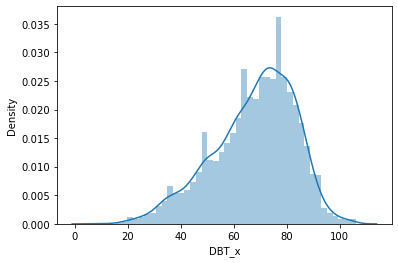

In [ ]:
#ploting to view distribution
sns.distplot(df_rem01['DBT_x'])

In [ ]:
#since it's skewed distribution filling null values with median value
df_rem01['DBT_x'].fillna(df_rem01['DBT_x'].median(), inplace = True)

In [ ]:
df_rem01['DBT_x'].isnull().sum()

0

In [ ]:
df_rem01['DewPointTemp_x'].value_counts()

 62.0    225
 66.0    214
 61.0    210
 64.0    207
 68.0    206
        ... 
 80.0      1
-1.0       1
 3.0       1
 5.0       1
-4.0       1
Name: DewPointTemp_x, Length: 82, dtype: int64

C:\Users\chandan\anaconda3\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


<AxesSubplot:xlabel='DewPointTemp_x', ylabel='Density'>

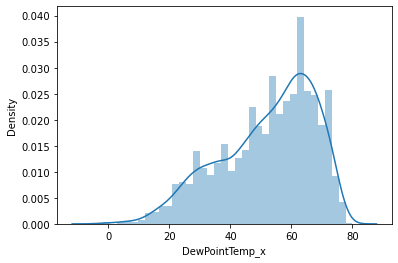

In [ ]:
sns.distplot(df_rem01['DewPointTemp_x'])

C:\Users\chandan\anaconda3\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


<AxesSubplot:xlabel='RelativeHumidityPercent_x', ylabel='Density'>

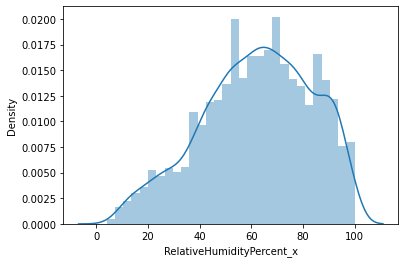

In [ ]:
sns.distplot(df_rem01['RelativeHumidityPercent_x'])

In [ ]:
#since it's skewed distribution filling null values with median value

df_rem01['DewPointTemp_x'].fillna(df_rem01['DewPointTemp_x'].median(), inplace = True)
df_rem01['RelativeHumidityPercent_x'].fillna(df_rem01['RelativeHumidityPercent_x'].median(), inplace = True)

In [ ]:
df_rem01['WindSpeed_x'].value_counts()

7.0     589
5.0     546
6.0     521
9.0     499
8.0     498
0.0     490
10.0    479
4.0     477
3.0     368
11.0    368
12.0    348
13.0    221
14.0    221
15.0    158
7       146
6       141
8       137
5       134
10      126
9       114
4       109
17.0    105
16.0    105
0       100
3        98
11       88
18.0     86
12       78
19.0     53
13       51
21.0     41
20.0     38
14       35
22.0     23
15       22
16       21
17       13
18       11
27.0     10
23.0     10
24.0      9
26.0      8
25.0      7
19        7
21        5
20        4
25        3
30.0      3
23        2
22        2
32.0      2
28.0      2
31.0      1
38.0      1
41.0      1
33.0      1
24        1
35        1
37        1
26        1
Name: WindSpeed_x, dtype: int64

C:\Users\chandan\anaconda3\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


<AxesSubplot:xlabel='WindSpeed_x', ylabel='Density'>

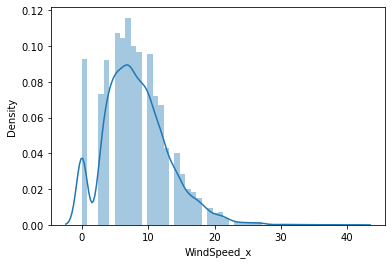

In [ ]:
sns.distplot(df_rem01['WindSpeed_x'])

In [ ]:
df_rem01['WindDirection_x'].value_counts()

000    590
VRB    510
180    274
190    258
200    253
160    251
170    248
210    218
150    216
220    206
240    203
230    197
100    190
130    185
260    183
290    183
010    180
280    180
250    178
300    177
270    176
140    175
070    173
310    171
080    168
020    168
090    167
330    166
340    163
320    162
060    161
360    157
040    153
350    145
030    144
110    142
050    141
120    128
Name: WindDirection_x, dtype: int64

C:\Users\chandan\anaconda3\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


<AxesSubplot:xlabel='WindGustValue_x', ylabel='Density'>

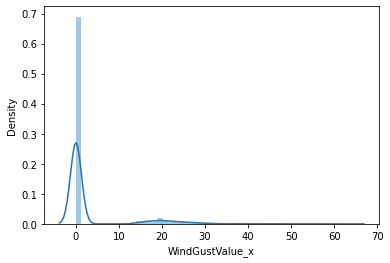

In [ ]:
sns.distplot(df_rem01['WindGustValue_x'])

In [ ]:
#since it's skewed distribution filling null values with median value

df_rem01['WindSpeed_x'].fillna(df_rem01['WindSpeed_x'].median(), inplace = True)

In [ ]:
df_rem01['WindDirection_x'] = df_rem01['WindDirection_x'].astype(str)
df_rem01['WindDirection_x'].fillna(df_rem01['WindDirection_x'].mode(), inplace = True)

In [ ]:
df_rem01['WindGustValue_x'].fillna(df_rem01['WindGustValue_x'].median(), inplace = True)

C:\Users\chandan\anaconda3\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


<AxesSubplot:xlabel='StationPressure_x', ylabel='Density'>

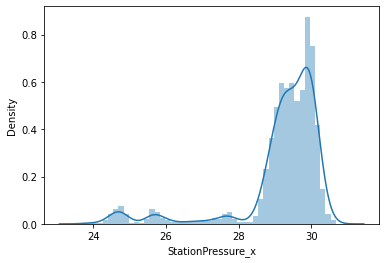

In [ ]:
sns.distplot(df_rem01['StationPressure_x'])

In [ ]:
df_rem01['StationPressure_x'].fillna(df_rem01['StationPressure_x'].median(), inplace = True)

In [ ]:
df_rem01.isnull().sum()

FlightNumber                   0
Year                           0
Month                          0
DayofMonth                     0
DayOfWeek                      0
ScheduledTravelTime            0
Origin                         0
Destination                    0
Distance                       0
FlightDelayStatus              0
time_hours_x                   0
ScheduledDepTime_Hour          0
ScheduledDepTime_minutes       0
ScheduledArrTime_Hour          0
ScheduledArrTime_minutes       0
WeatherStationID_x             0
SkyConditions_x                0
Visibility_x                   0
DBT_x                          0
DewPointTemp_x                 0
RelativeHumidityPercent_x      0
WindSpeed_x                    0
WindDirection_x                0
WindGustValue_x                0
StationPressure_x              0
weather_Dep_Hour               0
weather_Dep_minutes            0
time_hours_y                   0
WeatherStationID_y             0
SkyConditions_y                3
Visibility

In [ ]:
#repeating the same above steps for destination weather data

df_rem01['SkyConditions_y'] = df_rem01['SkyConditions_y'].astype(str)
df_rem01['SkyConditions_y'].fillna(df_rem01['SkyConditions_y'].mode(), inplace = True)

df_rem01['Visibility_y'] = df_rem01['Visibility_y'].astype(str)
df_rem01['Visibility_y'].fillna(df_rem01['Visibility_y'].mode(), inplace = True)

df_rem01['DBT_y'].fillna(df_rem01['DBT_y'].median(), inplace = True)

df_rem01['DewPointTemp_y'].fillna(df_rem01['DewPointTemp_y'].median(), inplace = True)
df_rem01['RelativeHumidityPercent_y'].fillna(df_rem01['RelativeHumidityPercent_y'].median(), inplace = True)

df_rem01['WindSpeed_y'].fillna(df_rem01['WindSpeed_y'].median(), inplace = True)

df_rem01['WindDirection_y'] = df_rem01['WindDirection_y'].astype(str)
df_rem01['WindDirection_y'].fillna(df_rem01['WindDirection_y'].mode(), inplace = True)

df_rem01['WindGustValue_y'].fillna(df_rem01['WindGustValue_y'].median(), inplace = True)

df_rem01['StationPressure_y'].fillna(df_rem01['StationPressure_y'].median(), inplace = True)

In [ ]:
df_rem01.isnull().sum()

FlightNumber                 0
Year                         0
Month                        0
DayofMonth                   0
DayOfWeek                    0
ScheduledTravelTime          0
Origin                       0
Destination                  0
Distance                     0
FlightDelayStatus            0
time_hours_x                 0
ScheduledDepTime_Hour        0
ScheduledDepTime_minutes     0
ScheduledArrTime_Hour        0
ScheduledArrTime_minutes     0
WeatherStationID_x           0
SkyConditions_x              0
Visibility_x                 0
DBT_x                        0
DewPointTemp_x               0
RelativeHumidityPercent_x    0
WindSpeed_x                  0
WindDirection_x              0
WindGustValue_x              0
StationPressure_x            0
weather_Dep_Hour             0
weather_Dep_minutes          0
time_hours_y                 0
WeatherStationID_y           0
SkyConditions_y              0
Visibility_y                 0
DBT_y                        0
DewPoint

In [ ]:
df_rem01.nunique()

FlightNumber                 7742
Year                            1
Month                           6
DayofMonth                     31
DayOfWeek                       7
ScheduledTravelTime           323
Origin                        223
Destination                   215
Distance                      982
FlightDelayStatus               2
time_hours_x                   17
ScheduledDepTime_Hour          17
ScheduledDepTime_minutes       60
ScheduledArrTime_Hour          19
ScheduledArrTime_minutes       60
WeatherStationID_x            223
SkyConditions_x              3499
Visibility_x                   21
DBT_x                          95
DewPointTemp_x                 82
RelativeHumidityPercent_x      93
WindSpeed_x                    60
WindDirection_x                39
WindGustValue_x                33
StationPressure_x             504
weather_Dep_Hour               17
weather_Dep_minutes            52
time_hours_y                   19
WeatherStationID_y            215
SkyConditions_

In [ ]:
df_cln = df_rem01.copy()

In [ ]:
#droping the column because it contains only one unique value
df_cln = df_cln.drop(['Year', 'FlightNumber'], axis = 1)

In [ ]:
df_cln.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 7742 entries, 0 to 7860
Data columns (total 38 columns):
 #   Column                     Non-Null Count  Dtype  
---  ------                     --------------  -----  
 0   Month                      7742 non-null   int64  
 1   DayofMonth                 7742 non-null   int64  
 2   DayOfWeek                  7742 non-null   int64  
 3   ScheduledTravelTime        7742 non-null   int64  
 4   Origin                     7742 non-null   object 
 5   Destination                7742 non-null   object 
 6   Distance                   7742 non-null   int64  
 7   FlightDelayStatus          7742 non-null   int64  
 8   time_hours_x               7742 non-null   int64  
 9   ScheduledDepTime_Hour      7742 non-null   int32  
 10  ScheduledDepTime_minutes   7742 non-null   int32  
 11  ScheduledArrTime_Hour      7742 non-null   int32  
 12  ScheduledArrTime_minutes   7742 non-null   int32  
 13  WeatherStationID_x         7742 non-null   float

In [ ]:
#converting columns into integer

df_cln['WeatherStationID_x'] = df_cln['WeatherStationID_x'].astype(int)
df_cln['DBT_x'] = df_cln['DBT_x'].astype(int)
df_cln['DewPointTemp_x'] = df_cln['DewPointTemp_x'].astype(int)
df_cln['RelativeHumidityPercent_x'] = df_cln['RelativeHumidityPercent_x'].astype(int)
df_cln['WindSpeed_x'] = df_cln['WindSpeed_x'].astype(int)
df_cln['WindGustValue_x'] = df_cln['WindGustValue_x'].astype(int)
df_cln['StationPressure_x'] = df_cln['StationPressure_x'].astype(int)
df_cln['weather_Dep_Hour'] = df_cln['weather_Dep_Hour'].astype(int)
df_cln['weather_Dep_minutes'] = df_cln['weather_Dep_minutes'].astype(int)
df_cln['time_hours_y'] = df_cln['time_hours_y'].astype(int)

In [ ]:
df_cln['WeatherStationID_y'] = df_cln['WeatherStationID_y'].astype(int)
df_cln['DBT_y'] = df_cln['DBT_y'].astype(int)
df_cln['DewPointTemp_y'] = df_cln['DewPointTemp_y'].astype(int)
df_cln['RelativeHumidityPercent_y'] = df_cln['RelativeHumidityPercent_y'].astype(int)
df_cln['WindSpeed_y'] = df_cln['WindSpeed_y'].astype(int)
df_cln['WindGustValue_y'] = df_cln['WindGustValue_y'].astype(int)
df_cln['StationPressure_y'] = df_cln['StationPressure_y'].astype(int)
df_cln['weather_Arr_Hour'] = df_cln['weather_Arr_Hour'].astype(int)
df_cln['weather_Arr_minutes'] = df_cln['weather_Arr_minutes'].astype(int)


In [ ]:
df_cln.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 7742 entries, 0 to 7860
Data columns (total 38 columns):
 #   Column                     Non-Null Count  Dtype 
---  ------                     --------------  ----- 
 0   Month                      7742 non-null   int64 
 1   DayofMonth                 7742 non-null   int64 
 2   DayOfWeek                  7742 non-null   int64 
 3   ScheduledTravelTime        7742 non-null   int64 
 4   Origin                     7742 non-null   object
 5   Destination                7742 non-null   object
 6   Distance                   7742 non-null   int64 
 7   FlightDelayStatus          7742 non-null   int64 
 8   time_hours_x               7742 non-null   int64 
 9   ScheduledDepTime_Hour      7742 non-null   int32 
 10  ScheduledDepTime_minutes   7742 non-null   int32 
 11  ScheduledArrTime_Hour      7742 non-null   int32 
 12  ScheduledArrTime_minutes   7742 non-null   int32 
 13  WeatherStationID_x         7742 non-null   int32 
 14  SkyCondi

In [ ]:
#finding correlation between columns
corr = df_cln.corr()

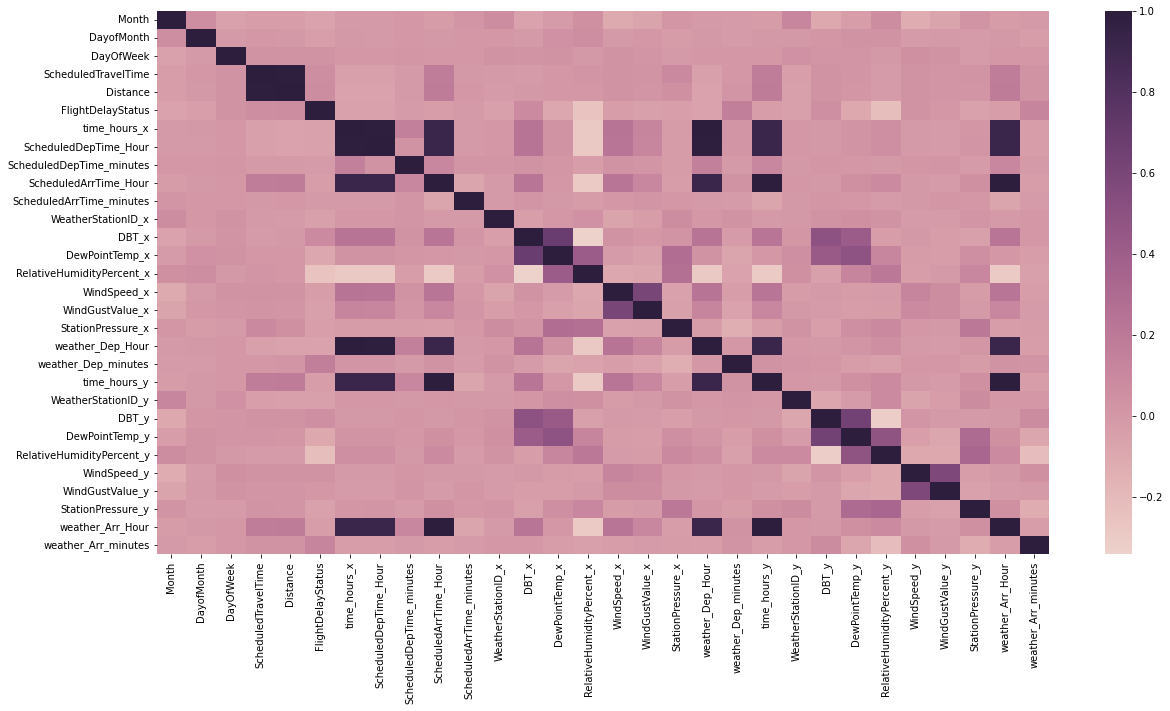

In [ ]:
#ploting correlation using heatmap
plt.figure(figsize=(20, 10))
sns.heatmap(corr, cmap=sns.cubehelix_palette(as_cmap=True))
plt.show()

In [ ]:
#droping strongly correlated columns

df_cln=  df_cln.drop(columns = ['ScheduledDepTime_Hour', 'ScheduledArrTime_Hour', 'weather_Dep_Hour', 'weather_Arr_Hour',
                               'ScheduledTravelTime', 'time_hours_y', 'WindGustValue_x', 'WindGustValue_y', 'DBT_x', 'DBT_y'])

In [ ]:
corr01 = df_cln.corr()

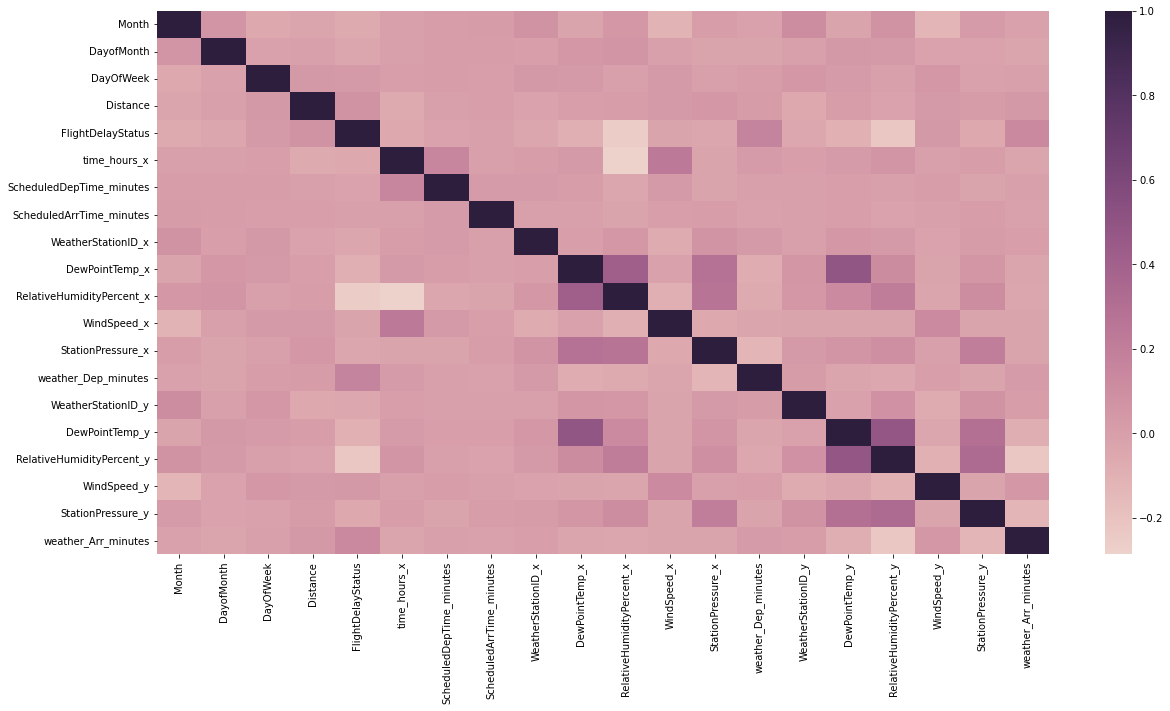

In [ ]:
plt.figure(figsize=(20, 10))
sns.heatmap(corr01, cmap=sns.cubehelix_palette(as_cmap=True))
plt.show()

In [ ]:
df_cln.columns

Index(['Month', 'DayofMonth', 'DayOfWeek', 'Origin', 'Destination', 'Distance',
       'FlightDelayStatus', 'time_hours_x', 'ScheduledDepTime_minutes',
       'ScheduledArrTime_minutes', 'WeatherStationID_x', 'SkyConditions_x',
       'Visibility_x', 'DewPointTemp_x', 'RelativeHumidityPercent_x',
       'WindSpeed_x', 'WindDirection_x', 'StationPressure_x',
       'weather_Dep_minutes', 'WeatherStationID_y', 'SkyConditions_y',
       'Visibility_y', 'DewPointTemp_y', 'RelativeHumidityPercent_y',
       'WindSpeed_y', 'WindDirection_y', 'StationPressure_y',
       'weather_Arr_minutes'],
      dtype='object')

In [ ]:
df_cln.describe()

,Month,DayofMonth,DayOfWeek,Distance,FlightDelayStatus,time_hours_x,ScheduledDepTime_minutes,ScheduledArrTime_minutes,WeatherStationID_x,DewPointTemp_x,RelativeHumidityPercent_x,WindSpeed_x,StationPressure_x,weather_Dep_minutes,WeatherStationID_y,DewPointTemp_y,RelativeHumidityPercent_y,WindSpeed_y,StationPressure_y,weather_Arr_minutes
count,7742.000000,7742.000000,7742.000000,7742.000000,7742.000000,7742.000000,7742.000000,7742.000000,7742.000000,7742.000000,7742.000000,7742.000000,7742.000000,7742.000000,7742.000000,7742.000000,7742.000000,7742.000000,7742.000000,7742.000000
mean,7.174632,15.536554,3.932576,744.755748,1.810127,12.127874,27.179928,29.060837,29635.776802,52.365151,62.241152,8.244510,28.703565,51.486696,30324.120124,52.574787,59.817231,8.112245,28.693361,45.990183
std,2.774659,9.012279,1.967728,522.779274,0.392226,3.592457,17.853935,17.828680,31270.403291,14.765001,20.352477,4.858309,1.245412,6.122444,31682.916626,14.352341,19.524917,4.703390,1.232868,16.344159
min,1.000000,1.000000,1.000000,69.000000,1.000000,3.000000,0.000000,0.000000,3017.000000,-4.000000,4.000000,0.000000,23.000000,0.000000,3017.000000,-27.000000,4.000000,0.000000,23.000000,0.000000
25%,5.000000,8.000000,2.000000,368.000000,2.000000,9.000000,11.000000,14.000000,13739.000000,43.000000,50.000000,5.000000,29.000000,51.000000,13739.000000,44.000000,48.000000,5.000000,29.000000,51.000000
50%,7.000000,15.000000,4.000000,595.000000,2.000000,12.000000,30.000000,30.000000,14739.000000,55.000000,63.000000,8.000000,29.000000,53.000000,14739.000000,55.000000,61.000000,8.000000,29.000000,53.000000
75%,9.000000,23.000000,6.000000,953.500000,2.000000,15.000000,43.000000,45.000000,23293.000000,64.000000,77.000000,11.000000,29.000000,54.000000,23293.000000,63.000000,73.000000,11.000000,29.000000,54.000000
max,11.000000,31.000000,7.000000,4962.000000,2.000000,23.000000,59.000000,59.000000,94860.000000,80.000000,100.000000,41.000000,30.000000,56.000000,94860.000000,79.000000,100.000000,39.000000,30.000000,59.000000


C:\Users\chandan\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:xlabel='Distance'>

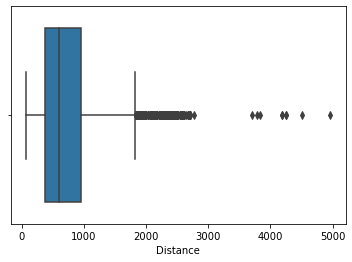

In [ ]:
sns.boxplot(df_cln['Distance'])

C:\Users\chandan\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:xlabel='DewPointTemp_x'>

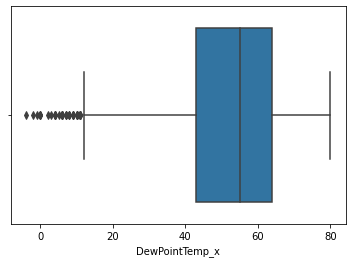

In [ ]:
#checking for outliers

sns.boxplot(df_cln['DewPointTemp_x'])

C:\Users\chandan\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:xlabel='RelativeHumidityPercent_x'>

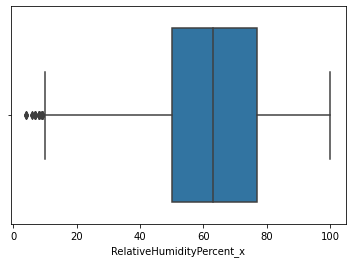

In [ ]:
sns.boxplot(df_cln['RelativeHumidityPercent_x'])

C:\Users\chandan\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:xlabel='WindSpeed_x'>

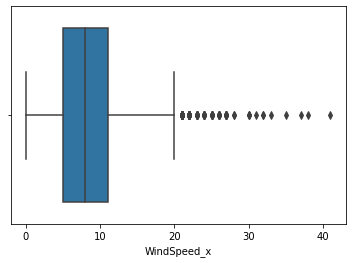

In [ ]:
sns.boxplot(df_cln['WindSpeed_x'])

C:\Users\chandan\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:xlabel='StationPressure_x'>

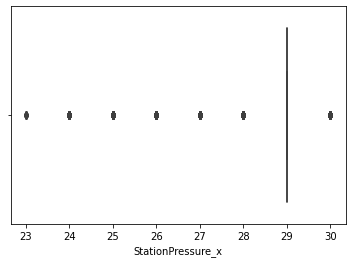

In [ ]:
sns.boxplot(df_cln['StationPressure_x'])

C:\Users\chandan\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:xlabel='weather_Dep_minutes'>

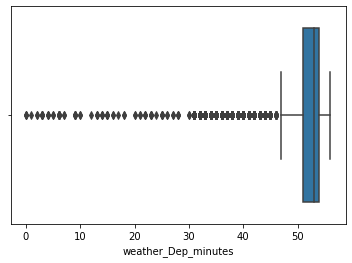

In [ ]:
sns.boxplot(df_cln['weather_Dep_minutes'])

C:\Users\chandan\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:xlabel='DewPointTemp_y'>

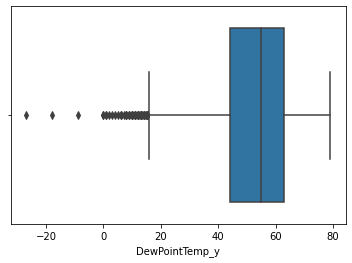

In [ ]:
sns.boxplot(df_cln['DewPointTemp_y'])

C:\Users\chandan\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:xlabel='RelativeHumidityPercent_y'>

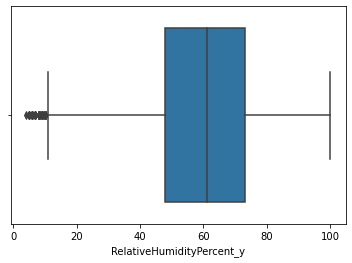

In [ ]:
sns.boxplot(df_cln['RelativeHumidityPercent_y'])

C:\Users\chandan\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:xlabel='WindSpeed_y'>

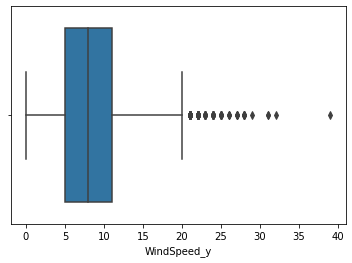

In [ ]:
sns.boxplot(df_cln['WindSpeed_y'])

C:\Users\chandan\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:xlabel='StationPressure_y'>

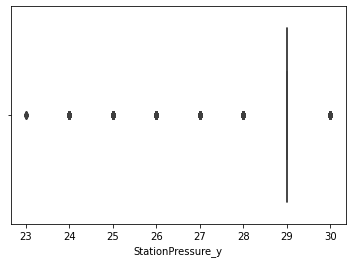

In [ ]:
sns.boxplot(df_cln['StationPressure_y'])

C:\Users\chandan\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:xlabel='weather_Arr_minutes'>

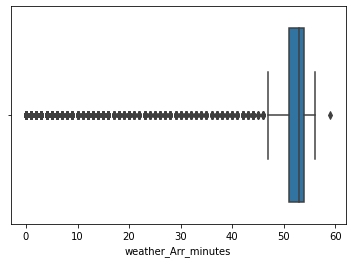

In [ ]:
sns.boxplot(df_cln['weather_Arr_minutes'])

In [ ]:
pre_train = df_cln.copy()

In [ ]:
#calculating 25 and 75 percentile of a column
per25 = pre_train['Distance'].quantile(0.25)
per75 =  pre_train['Distance'].quantile(0.75)

#deriving iqr
iqr = per75 - per25

#setting upper limit and lower limit
upper_limit = per75 + 1.5 * iqr
lower_limit = per25 - 1.5 * iqr

In [ ]:
pre_train[pre_train['Distance'] > upper_limit]

,Month,DayofMonth,DayOfWeek,Origin,Destination,Distance,FlightDelayStatus,time_hours_x,ScheduledDepTime_minutes,ScheduledArrTime_minutes,...,weather_Dep_minutes,WeatherStationID_y,SkyConditions_y,Visibility_y,DewPointTemp_y,RelativeHumidityPercent_y,WindSpeed_y,WindDirection_y,StationPressure_y,weather_Arr_minutes
11,3,24,3,DFW,SJU,2165,2,15,21,43,...,53,11641,FEW040 SCT055,10SM,69,82,4,090,30,56
17,9,25,6,LGB,JFK,2465,2,9,0,20,...,31,94789,FEW040 BKN250,10SM,62,81,8,190,30,51
21,7,5,1,MDW,SFO,1855,2,7,50,15,...,53,23234,SCT013,7SM,55,61,4,010,29,29
22,5,22,6,SEA,EWR,2401,1,8,10,21,...,39,14734,BKN065,7SM,66,62,7,100,29,51
56,9,10,5,BOS,OAK,2693,2,8,20,0,...,54,23230,CLR,10SM,54,55,10,300,29,53
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7776,7,13,2,LAX,OGG,2486,2,9,0,30,...,50,22516,CLR,10SM,65,51,21,050,30,54
7787,9,17,5,OAK,MDW,1844,2,10,40,40,...,53,14819,FEW250,10SM,48,58,9,050,29,3
7796,5,1,6,IAD,SFO,2419,1,9,50,41,...,51,23234,SCT250,10SM,55,61,18,280,29,23
7801,9,30,4,SFO,IAD,2419,2,6,0,10,...,56,93738,SCT050,9SM,52,46,8,290,29,51


In [ ]:
#replacing values greater than upper_limit to upper_limit and values lower than lower_limit to lower_limit
pre_train['Distance'] = np.where( pre_train['Distance'] > upper_limit, upper_limit,
                    np.where( pre_train['Distance'] < lower_limit, lower_limit,
                     pre_train['Distance'] ))

C:\Users\chandan\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:xlabel='Distance'>

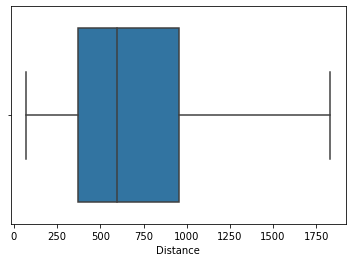

In [ ]:
sns.boxplot(pre_train['Distance'])

In [ ]:
per25 = pre_train['DewPointTemp_x'].quantile(0.25)
per75 =  pre_train['DewPointTemp_x'].quantile(0.75)

iqr = per75 - per25

upper_limit = per75 + 1.5 * iqr
lower_limit = per25 - 1.5 * iqr

pre_train['DewPointTemp_x'] = np.where( pre_train['DewPointTemp_x'] > upper_limit, upper_limit,
                    np.where( pre_train['DewPointTemp_x'] < lower_limit, lower_limit,
                     pre_train['DewPointTemp_x'] ))

In [ ]:
per25 = pre_train['RelativeHumidityPercent_x'].quantile(0.25)
per75 =  pre_train['RelativeHumidityPercent_x'].quantile(0.75)

iqr = per75 - per25

upper_limit = per75 + 1.5 * iqr
lower_limit = per25 - 1.5 * iqr

pre_train['RelativeHumidityPercent_x'] = np.where( pre_train['RelativeHumidityPercent_x'] > upper_limit, upper_limit,
                    np.where( pre_train['RelativeHumidityPercent_x'] < lower_limit, lower_limit,
                     pre_train['RelativeHumidityPercent_x'] ))

In [ ]:
per25 = pre_train['WindSpeed_x'].quantile(0.25)
per75 =  pre_train['WindSpeed_x'].quantile(0.75)

iqr = per75 - per25

upper_limit = per75 + 1.5 * iqr
lower_limit = per25 - 1.5 * iqr

pre_train['WindSpeed_x'] = np.where( pre_train['WindSpeed_x'] > upper_limit, upper_limit,
                    np.where( pre_train['WindSpeed_x'] < lower_limit, lower_limit,
                     pre_train['WindSpeed_x'] ))

In [ ]:
per25 = pre_train['StationPressure_x'].quantile(0.25)
per75 =  pre_train['StationPressure_x'].quantile(0.75)

iqr = per75 - per25

upper_limit = per75 + 1.5 * iqr
lower_limit = per25 - 1.5 * iqr

pre_train['StationPressure_x'] = np.where( pre_train['StationPressure_x'] > upper_limit, upper_limit,
                    np.where( pre_train['StationPressure_x'] < lower_limit, lower_limit,
                     pre_train['StationPressure_x'] ))

In [ ]:
per25 = pre_train['DewPointTemp_y'].quantile(0.25)
per75 =  pre_train['DewPointTemp_y'].quantile(0.75)

iqr = per75 - per25

upper_limit = per75 + 1.5 * iqr
lower_limit = per25 - 1.5 * iqr

pre_train['DewPointTemp_y'] = np.where( pre_train['DewPointTemp_y'] > upper_limit, upper_limit,
                    np.where( pre_train['DewPointTemp_y'] < lower_limit, lower_limit,
                     pre_train['DewPointTemp_y'] ))

In [ ]:
per25 = pre_train['RelativeHumidityPercent_y'].quantile(0.25)
per75 =  pre_train['RelativeHumidityPercent_y'].quantile(0.75)

iqr = per75 - per25

upper_limit = per75 + 1.5 * iqr
lower_limit = per25 - 1.5 * iqr

pre_train['RelativeHumidityPercent_y'] = np.where( pre_train['RelativeHumidityPercent_y'] > upper_limit, upper_limit,
                    np.where( pre_train['RelativeHumidityPercent_y'] < lower_limit, lower_limit,
                     pre_train['RelativeHumidityPercent_y'] ))

In [ ]:
per25 = pre_train['WindSpeed_y'].quantile(0.25)
per75 =  pre_train['WindSpeed_y'].quantile(0.75)

iqr = per75 - per25

upper_limit = per75 + 1.5 * iqr
lower_limit = per25 - 1.5 * iqr

pre_train['WindSpeed_y'] = np.where( pre_train['WindSpeed_y'] > upper_limit, upper_limit,
                    np.where( pre_train['WindSpeed_y'] < lower_limit, lower_limit,
                     pre_train['WindSpeed_y'] ))

In [ ]:
per25 = pre_train['StationPressure_y'].quantile(0.25)
per75 =  pre_train['StationPressure_y'].quantile(0.75)

iqr = per75 - per25

upper_limit = per75 + 1.5 * iqr
lower_limit = per25 - 1.5 * iqr

pre_train['StationPressure_y'] = np.where( pre_train['StationPressure_y'] > upper_limit, upper_limit,
                    np.where( pre_train['StationPressure_y'] < lower_limit, lower_limit,
                     pre_train['StationPressure_y'] ))

In [ ]:
per25 = pre_train['weather_Arr_minutes'].quantile(0.25)
per75 =  pre_train['weather_Arr_minutes'].quantile(0.75)

iqr = per75 - per25

upper_limit = per75 + 1.5 * iqr
lower_limit = per25 - 1.5 * iqr

pre_train['weather_Arr_minutes'] = np.where( pre_train['weather_Arr_minutes'] > upper_limit, upper_limit,
                    np.where( pre_train['weather_Arr_minutes'] < lower_limit, lower_limit,
                     pre_train['weather_Arr_minutes'] ))

In [ ]:
per25 = pre_train['weather_Dep_minutes'].quantile(0.25)
per75 =  pre_train['weather_Dep_minutes'].quantile(0.75)

iqr = per75 - per25

upper_limit = per75 + 1.5 * iqr
lower_limit = per25 - 1.5 * iqr

pre_train['weather_Dep_minutes'] = np.where( pre_train['weather_Dep_minutes'] > upper_limit, upper_limit,
                    np.where( pre_train['weather_Dep_minutes'] < lower_limit, lower_limit,
                     pre_train['weather_Dep_minutes'] ))

In [ ]:
pre_train.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 7742 entries, 0 to 7860
Data columns (total 28 columns):
 #   Column                     Non-Null Count  Dtype  
---  ------                     --------------  -----  
 0   Month                      7742 non-null   int64  
 1   DayofMonth                 7742 non-null   int64  
 2   DayOfWeek                  7742 non-null   int64  
 3   Origin                     7742 non-null   object 
 4   Destination                7742 non-null   object 
 5   Distance                   7742 non-null   float64
 6   FlightDelayStatus          7742 non-null   int64  
 7   time_hours_x               7742 non-null   int64  
 8   ScheduledDepTime_minutes   7742 non-null   int32  
 9   ScheduledArrTime_minutes   7742 non-null   int32  
 10  WeatherStationID_x         7742 non-null   int32  
 11  SkyConditions_x            7742 non-null   object 
 12  Visibility_x               7742 non-null   object 
 13  DewPointTemp_x             7742 non-null   float

In [ ]:
train = pre_train.copy()

In [ ]:
train.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 7742 entries, 0 to 7860
Data columns (total 28 columns):
 #   Column                     Non-Null Count  Dtype  
---  ------                     --------------  -----  
 0   Month                      7742 non-null   int64  
 1   DayofMonth                 7742 non-null   int64  
 2   DayOfWeek                  7742 non-null   int64  
 3   Origin                     7742 non-null   object 
 4   Destination                7742 non-null   object 
 5   Distance                   7742 non-null   float64
 6   FlightDelayStatus          7742 non-null   int64  
 7   time_hours_x               7742 non-null   int64  
 8   ScheduledDepTime_minutes   7742 non-null   int32  
 9   ScheduledArrTime_minutes   7742 non-null   int32  
 10  WeatherStationID_x         7742 non-null   int32  
 11  SkyConditions_x            7742 non-null   object 
 12  Visibility_x               7742 non-null   object 
 13  DewPointTemp_x             7742 non-null   float

In [ ]:
#droping orgin and destination because WeatherStationID_x and WeatherStationID_y were extracted by using these columns

train.drop(['Origin', 'Destination'], axis = 1, inplace = True)

In [ ]:
#importing label encoder

from sklearn.preprocessing import LabelEncoder

le = LabelEncoder()

In [ ]:
#transforming categorical column into integer by label encoding

train['SkyConditions_x'] = le.fit_transform(train['SkyConditions_x'])

In [ ]:
train['Visibility_x'] = le.fit_transform(train['Visibility_x'])

In [ ]:
train['WindDirection_x'] = le.fit_transform(train['WindDirection_x'])

In [ ]:
train['WeatherStationID_x'] = le.fit_transform(train['WeatherStationID_x'])
train['WeatherStationID_y'] = le.fit_transform(train['WeatherStationID_y'])


In [ ]:
train['SkyConditions_y'] = le.fit_transform(train['SkyConditions_y'])
train['Visibility_y'] = le.fit_transform(train['Visibility_y'])
train['WindDirection_y'] = le.fit_transform(train['WindDirection_y'])

train['FlightDelayStatus'] = le.fit_transform(train['FlightDelayStatus'])


In [ ]:
#converting float into integer

train['Distance'] = train['Distance'].astype(int)
train['DewPointTemp_x'] = train['DewPointTemp_x'].astype(int)
train['RelativeHumidityPercent_x'] = train['RelativeHumidityPercent_x'].astype(int)
train['WindSpeed_x'] = train['WindSpeed_x'].astype(int)
train['StationPressure_x'] = train['StationPressure_x'].astype(int)
train['weather_Dep_minutes'] = train['weather_Dep_minutes'].astype(int)
train['DewPointTemp_y'] = train['DewPointTemp_y'].astype(int)
train['RelativeHumidityPercent_y'] = train['RelativeHumidityPercent_y'].astype(int)
train['WindSpeed_y'] = train['WindSpeed_y'].astype(int)
train['StationPressure_y'] = train['StationPressure_y'].astype(int)
train['weather_Arr_minutes'] = train['weather_Arr_minutes'].astype(int)

In [ ]:
train.columns

Index(['Month', 'DayofMonth', 'DayOfWeek', 'Distance', 'FlightDelayStatus',
       'time_hours_x', 'ScheduledDepTime_minutes', 'ScheduledArrTime_minutes',
       'WeatherStationID_x', 'SkyConditions_x', 'Visibility_x',
       'DewPointTemp_x', 'RelativeHumidityPercent_x', 'WindSpeed_x',
       'WindDirection_x', 'StationPressure_x', 'weather_Dep_minutes',
       'WeatherStationID_y', 'SkyConditions_y', 'Visibility_y',
       'DewPointTemp_y', 'RelativeHumidityPercent_y', 'WindSpeed_y',
       'WindDirection_y', 'StationPressure_y', 'weather_Arr_minutes'],
      dtype='object')

In [ ]:
train = train.reset_index(drop=True)

In [ ]:
train

,Month,DayofMonth,DayOfWeek,Distance,FlightDelayStatus,time_hours_x,ScheduledDepTime_minutes,ScheduledArrTime_minutes,WeatherStationID_x,SkyConditions_x,...,weather_Dep_minutes,WeatherStationID_y,SkyConditions_y,Visibility_y,DewPointTemp_y,RelativeHumidityPercent_y,WindSpeed_y,WindDirection_y,StationPressure_y,weather_Arr_minutes
0,9,20,1,563,1,10,0,54,97,2334,...,54,101,2297,9,35,27,8,19,29,51
1,11,19,5,554,0,15,40,34,107,2362,...,51,55,255,13,55,61,5,16,29,46
2,5,4,2,226,1,18,0,2,194,722,...,53,138,707,9,25,10,8,19,29,56
3,7,6,2,508,1,14,0,33,64,1628,...,51,26,2900,9,55,61,8,28,29,46
4,9,23,4,334,1,8,30,46,124,603,...,53,212,2287,9,55,44,8,20,29,56
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7737,7,6,2,270,1,13,51,57,60,1785,...,53,62,3059,9,74,51,7,34,29,56
7738,5,27,4,861,1,8,35,0,44,2670,...,53,0,2066,9,55,61,20,28,29,46
7739,11,29,1,946,1,12,55,54,94,702,...,51,64,3160,9,43,50,8,12,29,53
7740,5,11,2,239,1,13,50,5,201,1828,...,51,42,3156,9,58,43,9,19,29,54


In [ ]:

train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7742 entries, 0 to 7741
Data columns (total 26 columns):
 #   Column                     Non-Null Count  Dtype
---  ------                     --------------  -----
 0   Month                      7742 non-null   int64
 1   DayofMonth                 7742 non-null   int64
 2   DayOfWeek                  7742 non-null   int64
 3   Distance                   7742 non-null   int32
 4   FlightDelayStatus          7742 non-null   int64
 5   time_hours_x               7742 non-null   int64
 6   ScheduledDepTime_minutes   7742 non-null   int32
 7   ScheduledArrTime_minutes   7742 non-null   int32
 8   WeatherStationID_x         7742 non-null   int64
 9   SkyConditions_x            7742 non-null   int32
 10  Visibility_x               7742 non-null   int32
 11  DewPointTemp_x             7742 non-null   int32
 12  RelativeHumidityPercent_x  7742 non-null   int32
 13  WindSpeed_x                7742 non-null   int32
 14  WindDirection_x         

In [ ]:
X = train.loc[:,train.columns!="FlightDelayStatus"]
y = train["FlightDelayStatus"]

In [ ]:
X

,Month,DayofMonth,DayOfWeek,Distance,time_hours_x,ScheduledDepTime_minutes,ScheduledArrTime_minutes,WeatherStationID_x,SkyConditions_x,Visibility_x,...,weather_Dep_minutes,WeatherStationID_y,SkyConditions_y,Visibility_y,DewPointTemp_y,RelativeHumidityPercent_y,WindSpeed_y,WindDirection_y,StationPressure_y,weather_Arr_minutes
0,9,20,1,563,10,0,54,97,2334,9,...,54,101,2297,9,35,27,8,19,29,51
1,11,19,5,554,15,40,34,107,2362,16,...,51,55,255,13,55,61,5,16,29,46
2,5,4,2,226,18,0,2,194,722,19,...,53,138,707,9,25,10,8,19,29,56
3,7,6,2,508,14,0,33,64,1628,9,...,51,26,2900,9,55,61,8,28,29,46
4,9,23,4,334,8,30,46,124,603,19,...,53,212,2287,9,55,44,8,20,29,56
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7737,7,6,2,270,13,51,57,60,1785,9,...,53,62,3059,9,74,51,7,34,29,56
7738,5,27,4,861,8,35,0,44,2670,9,...,53,0,2066,9,55,61,20,28,29,46
7739,11,29,1,946,12,55,54,94,702,9,...,51,64,3160,9,43,50,8,12,29,53
7740,5,11,2,239,13,50,5,201,1828,19,...,51,42,3156,9,58,43,9,19,29,54


In [ ]:
y

0       1
1       0
2       1
3       1
4       1
       ..
7737    1
7738    1
7739    1
7740    1
7741    0
Name: FlightDelayStatus, Length: 7742, dtype: int64

In [ ]:
from sklearn.model_selection import train_test_split

In [ ]:
X_train,X_test,y_train,y_test = train_test_split(X,y,test_size=0.3, stratify = y)

In [ ]:
print("X Train Shape:",X_train.shape)
print("y Train Shape:",y_train.shape)
print("X Test Shape:",X_test.shape)
print("y Test Shape:",y_test.shape)

X Train Shape: (5419, 25)
y Train Shape: (5419,)
X Test Shape: (2323, 25)
y Test Shape: (2323,)


In [ ]:
y_train.value_counts()/5419*100

1    81.011257
0    18.988743
Name: FlightDelayStatus, dtype: float64

In [ ]:
y_test.value_counts()/2323*100

1    81.015928
0    18.984072
Name: FlightDelayStatus, dtype: float64

In [ ]:
X_train.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 5419 entries, 1358 to 1243
Data columns (total 25 columns):
 #   Column                     Non-Null Count  Dtype
---  ------                     --------------  -----
 0   Month                      5419 non-null   int64
 1   DayofMonth                 5419 non-null   int64
 2   DayOfWeek                  5419 non-null   int64
 3   Distance                   5419 non-null   int32
 4   time_hours_x               5419 non-null   int64
 5   ScheduledDepTime_minutes   5419 non-null   int32
 6   ScheduledArrTime_minutes   5419 non-null   int32
 7   WeatherStationID_x         5419 non-null   int64
 8   SkyConditions_x            5419 non-null   int32
 9   Visibility_x               5419 non-null   int32
 10  DewPointTemp_x             5419 non-null   int32
 11  RelativeHumidityPercent_x  5419 non-null   int32
 12  WindSpeed_x                5419 non-null   int32
 13  WindDirection_x            5419 non-null   int32
 14  StationPressure_x    

In [ ]:
from sklearn.ensemble import RandomForestClassifier

In [ ]:
rfc = RandomForestClassifier()
rfc.fit(X_train,y_train)

RandomForestClassifier()

In [ ]:
from sklearn.metrics import accuracy_score
from sklearn.metrics import f1_score
from sklearn.metrics import classification_report

In [ ]:
train_preds = rfc.predict(X_train)
test_preds = rfc.predict(X_test)

In [ ]:
print("Train Data")
print(classification_report(y_train,train_preds))

Train Data
              precision    recall  f1-score   support

           0       1.00      1.00      1.00      1029
           1       1.00      1.00      1.00      4390

    accuracy                           1.00      5419
   macro avg       1.00      1.00      1.00      5419
weighted avg       1.00      1.00      1.00      5419



In [ ]:
print("Test Data")
print(classification_report(y_test,test_preds))

Test Data
              precision    recall  f1-score   support

           0       0.61      0.26      0.37       441
           1       0.85      0.96      0.90      1882

    accuracy                           0.83      2323
   macro avg       0.73      0.61      0.63      2323
weighted avg       0.80      0.83      0.80      2323



In [ ]:
from xgboost import XGBClassifier

In [ ]:
xg=XGBClassifier(objective='binary:logistic')

In [ ]:
xg.fit(X_train,y_train)

XGBClassifier(base_score=0.5, booster='gbtree', callbacks=None,
              colsample_bylevel=1, colsample_bynode=1, colsample_bytree=1,
              early_stopping_rounds=None, enable_categorical=False,
              eval_metric=None, feature_types=None, gamma=0, gpu_id=-1,
              grow_policy='depthwise', importance_type=None,
              interaction_constraints='', learning_rate=0.300000012,
              max_bin=256, max_cat_threshold=64, max_cat_to_onehot=4,
              max_delta_step=0, max_depth=6, max_leaves=0, min_child_weight=1,
              missing=nan, monotone_constraints='()', n_estimators=100,
              n_jobs=0, num_parallel_tree=1, predictor='auto', random_state=0, ...)

In [ ]:
train_preds = xg.predict(X_train)
test_preds = xg.predict(X_test)

In [ ]:
print("Train Data")
print(classification_report(y_train,train_preds))

Train Data
              precision    recall  f1-score   support

           0       1.00      1.00      1.00      1029
           1       1.00      1.00      1.00      4390

    accuracy                           1.00      5419
   macro avg       1.00      1.00      1.00      5419
weighted avg       1.00      1.00      1.00      5419



In [ ]:
print("Test Data")
print(classification_report(y_test,test_preds))

Test Data
              precision    recall  f1-score   support

           0       0.58      0.38      0.46       441
           1       0.87      0.94      0.90      1882

    accuracy                           0.83      2323
   macro avg       0.72      0.66      0.68      2323
weighted avg       0.81      0.83      0.82      2323



In [ ]:
from sklearn.model_selection import GridSearchCV

In [ ]:
# Define the parameter grid
param_grid = {'max_depth': [3, 5, 7],
              'learning_rate': [0.1, 0.2, 0.3],
              'n_estimators': [50, 100, 200]
             }

# Create the grid search object
grid_search = GridSearchCV(xg, param_grid, cv=5, scoring='f1')

# Fit the grid search to the data
grid_search.fit(X_train, y_train)

# Print the best parameters and the best f1 score
print("Best Parameters: ", grid_search.best_params_)
print("Best f1 Score: ", grid_search.best_score_)

Best Parameters:  {'learning_rate': 0.1, 'max_depth': 3, 'n_estimators': 200}
Best f1 Score:  0.9083897742792437


In [ ]:
xgb = XGBClassifier(objective='binary:logistic', learning_rate = 0.1, max_depth = 3, n_estimators = 200)

In [ ]:
xgb.fit(X_train, y_train)

XGBClassifier(base_score=0.5, booster='gbtree', callbacks=None,
              colsample_bylevel=1, colsample_bynode=1, colsample_bytree=1,
              early_stopping_rounds=None, enable_categorical=False,
              eval_metric=None, feature_types=None, gamma=0, gpu_id=-1,
              grow_policy='depthwise', importance_type=None,
              interaction_constraints='', learning_rate=0.1, max_bin=256,
              max_cat_threshold=64, max_cat_to_onehot=4, max_delta_step=0,
              max_depth=3, max_leaves=0, min_child_weight=1, missing=nan,
              monotone_constraints='()', n_estimators=200, n_jobs=0,
              num_parallel_tree=1, predictor='auto', random_state=0, ...)

In [ ]:
train_preds = xg.predict(X_train)
test_preds = xg.predict(X_test)

In [ ]:
print("Train Data")
print(classification_report(y_train,train_preds))

Train Data
              precision    recall  f1-score   support

           0       1.00      1.00      1.00      1029
           1       1.00      1.00      1.00      4390

    accuracy                           1.00      5419
   macro avg       1.00      1.00      1.00      5419
weighted avg       1.00      1.00      1.00      5419



In [ ]:
print("Test Data")
print(classification_report(y_test,test_preds))

Test Data
              precision    recall  f1-score   support

           0       0.58      0.38      0.46       441
           1       0.87      0.94      0.90      1882

    accuracy                           0.83      2323
   macro avg       0.72      0.66      0.68      2323
weighted avg       0.81      0.83      0.82      2323



In [ ]:
from sklearn.model_selection import cross_val_score

# Create the model
xgb = XGBClassifier()

# Perform 5-fold cross-validation
scores = cross_val_score(xgb, X, y, cv=10, scoring='f1')

# Print the mean and standard deviation of the f1 scores
print("Mean f1 Score: ", scores.mean())
print("Standard Deviation of f1 Scores: ", scores.std())


Mean f1 Score:  0.9012689236180209
Standard Deviation of f1 Scores:  0.003973539235575587


In [ ]:
from sklearn.model_selection import KFold

# create a KFold object with 5 splits
kf = KFold(n_splits=10, shuffle=True, random_state=0)


In [ ]:
for train_index, test_index in kf.split(X):
    X_train, X_test = X.iloc[train_index], X.iloc[test_index]
    y_train, y_test = y.iloc[train_index], y.iloc[test_index]
    xg.fit(X_train, y_train)
    print(xg.score(X_test, y_test))


0.8490322580645161
0.824516129032258
0.8255813953488372
0.8178294573643411
0.8333333333333334
0.8307493540051679
0.8372093023255814
0.8372093023255814
0.8436692506459949
0.8436692506459949


In [ ]:
train_preds = xg.predict(X_train)
test_preds = xg.predict(X_test)

In [ ]:
print("Train Data")
print(classification_report(y_train,train_preds))

Train Data
              precision    recall  f1-score   support

           0       1.00      0.99      0.99      1322
           1       1.00      1.00      1.00      5646

    accuracy                           1.00      6968
   macro avg       1.00      0.99      1.00      6968
weighted avg       1.00      1.00      1.00      6968



In [ ]:
print("Test Data")
print(classification_report(y_test,test_preds))

Test Data
              precision    recall  f1-score   support

           0       0.63      0.45      0.53       148
           1       0.88      0.94      0.91       626

    accuracy                           0.84       774
   macro avg       0.75      0.69      0.72       774
weighted avg       0.83      0.84      0.83       774



In [ ]:
from keras.models import Sequential
from keras.layers import Dense

In [ ]:
from sklearn.preprocessing import StandardScaler

# initialize the scaler
scaler = StandardScaler()

# fit the scaler to the training data
scaler.fit(X_train)

# transform the training data
X_train_scaled = scaler.transform(X_train)

# transform the test data
X_test_scaled = scaler.transform(X_test)


In [ ]:
model = Sequential()
model.add(Dense(64, input_dim=25, activation='relu'))
model.add(Dense(25, activation='relu'))
model.add(Dense(16, activation='relu'))
model.add(Dense(9, activation='relu'))
model.add(Dense(4, activation='relu'))

model.add(Dense(1, activation='sigmoid'))


In [ ]:
model.compile(loss='binary_crossentropy', optimizer='adam', metrics=['accuracy'])

In [ ]:
model.fit(X_train_scaled, y_train, epochs=10, batch_size=32)

Epoch 1/10
218/218 [==============================] - 5s 3ms/step - loss: 0.4532 - accuracy: 0.8058
Epoch 2/10
218/218 [==============================] - 1s 3ms/step - loss: 0.4043 - accuracy: 0.8111
Epoch 3/10
218/218 [==============================] - 1s 3ms/step - loss: 0.3920 - accuracy: 0.8173
Epoch 4/10
218/218 [==============================] - 1s 3ms/step - loss: 0.3827 - accuracy: 0.8278
Epoch 5/10
218/218 [==============================] - 1s 3ms/step - loss: 0.3713 - accuracy: 0.8388
Epoch 6/10
218/218 [==============================] - 1s 3ms/step - loss: 0.3620 - accuracy: 0.8431
Epoch 7/10
218/218 [==============================] - 1s 3ms/step - loss: 0.3522 - accuracy: 0.8473
Epoch 8/10
218/218 [==============================] - 1s 3ms/step - loss: 0.3450 - accuracy: 0.8476
Epoch 9/10
218/218 [==============================] - 1s 3ms/step - loss: 0.3345 - accuracy: 0.8558
Epoch 10/10
218/218 [==============================] - 1s 3ms/step - loss: 0.3255 - accuracy: 0.8576

In [ ]:
train_preds = model.predict(X_train_scaled)
test_preds = model.predict(X_test_scaled)

25/25 [==============================] - 0s 3ms/step


In [ ]:
train_preds = np.round(train_preds)

In [ ]:
test_preds = np.round(test_preds)

In [ ]:
train_preds

array([[0.],
       [1.],
       [1.],
       ...,
       [1.],
       [1.],
       [1.]], dtype=float32)

In [ ]:
print("Train Data")
print(classification_report(y_train,train_preds))

Train Data
              precision    recall  f1-score   support

           0       0.77      0.47      0.59      1322
           1       0.89      0.97      0.93      5646

    accuracy                           0.87      6968
   macro avg       0.83      0.72      0.76      6968
weighted avg       0.87      0.87      0.86      6968



In [ ]:
print("Test Data")
print(classification_report(y_test,test_preds))

Test Data
              precision    recall  f1-score   support

           0       0.51      0.33      0.40       148
           1       0.85      0.92      0.89       626

    accuracy                           0.81       774
   macro avg       0.68      0.63      0.64       774
weighted avg       0.79      0.81      0.80       774



# TEST

In [ ]:
df_t = pd.read_csv("ProblemStatement_Data&Instructions-1616503373207/DataForPHD_Forall/20210328_Testdata/Test.csv")

In [ ]:
df_t.head()

,FlightNumber,Year,Month,DayofMonth,DayOfWeek,ScheduledDepTime,ScheduledArrTime,ScheduledTravelTime,Origin,Destination,Distance
0,DEN_XNA_62349,2005,9,12,1,1516,1756,100,DEN,XNA,616
1,RIC_EWR_87213,2005,11,14,1,1300,1415,75,RIC,EWR,278
2,IAD_GSO_86576,2005,9,28,3,1040,1144,64,IAD,GSO,239
3,SAV_CVG_87264,2005,11,18,5,1120,1302,102,SAV,CVG,515
4,SBP_LAX_68158,2005,7,5,2,630,733,63,SBP,LAX,155


In [ ]:
def convert_to_time(value):
    time = datetime.strptime(value, '%H%M')
    return time.strftime('%I:%M %p')

df_t['ScheduledDepTime'] = df_t['ScheduledDepTime'].astype(str)
df_t['ScheduledArrTime'] = df_t['ScheduledArrTime'].astype(str)

df_t['ScheduledDepTime'] = df_t['ScheduledDepTime'].apply(convert_to_time)
df_t['ScheduledArrTime'] = df_t['ScheduledArrTime'].apply(convert_to_time)


In [ ]:
unique_values_col1 = df_t['Origin'].unique()

df_origin_t = pd.DataFrame(data = unique_values_col1 ,columns = ['AirportID'])


In [ ]:
df_all_id_t = pd.read_csv('ProblemStatement_Data&Instructions-1616503373207/DataForPHD_Forall/20210322_weatherdatatoconsider/AllStationsData_PHD.csv')

In [ ]:
df_origin_t = pd.merge(df_origin_t, df_all_id_t, on=['AirportID', 'AirportID'])

In [ ]:
df_origin_t.shape

(215, 8)

In [ ]:
df_id_t = df_origin_t.loc[:, ['AirportID', 'WeatherStationID']]

In [ ]:
df_03_t = pd.read_csv('ProblemStatement_Data&Instructions-1616503373207/DataForPHD_Forall/20210322_weatherdatatoconsider/2005/csv/200503hourly.csv')
df_07_t = pd.read_csv('ProblemStatement_Data&Instructions-1616503373207/DataForPHD_Forall/20210322_weatherdatatoconsider/2005/csv/200507hourly.csv')
df_09_t = pd.read_csv('ProblemStatement_Data&Instructions-1616503373207/DataForPHD_Forall/20210322_weatherdatatoconsider/2005/csv/200509hourly.csv')
df_11_t = pd.read_csv('ProblemStatement_Data&Instructions-1616503373207/DataForPHD_Forall/20210322_weatherdatatoconsider/2005/csv/200511hourly.csv')


C:\Users\chandan\anaconda3\lib\site-packages\IPython\core\interactiveshell.py:3444: DtypeWarning: Columns (8) have mixed types.Specify dtype option on import or set low_memory=False.
  exec(code_obj, self.user_global_ns, self.user_ns)


In [ ]:
df_weather_t = pd.concat([df_03_t, df_07_t, df_09_t, df_11_t], axis=0)

In [ ]:
df_weather_t.shape


(5031729, 12)

In [ ]:
df_weather_common_t = pd.merge(df_id_t, df_weather_t, on=['WeatherStationID', 'WeatherStationID'], how = 'left')

In [ ]:
df_new_com_t = df_weather_common_t.copy()

In [ ]:
df_new_com_t['Time'] = df_new_com_t['Time'].astype(str)
df_new_com_t['Time'] = df_new_com_t['Time'].apply(convert_to_time)

df_new_com_t['YearMonthDay'] = pd.to_datetime(df_new_com_t['YearMonthDay'], format='%Y%m%d')
df_new_com_t['Year'] = df_new_com_t['YearMonthDay'].dt.year
df_new_com_t['Month'] = df_new_com_t['YearMonthDay'].dt.month
df_new_com_t['DayofMonth'] = df_new_com_t['YearMonthDay'].dt.day

In [ ]:
df_new_com_t = df_new_com_t.rename(columns = {'AirportID' : 'Origin'})

In [ ]:
df_new_com_t.head()

,Origin,WeatherStationID,YearMonthDay,Time,SkyConditions,Visibility,DBT,DewPointTemp,RelativeHumidityPercent,WindSpeed,WindDirection,WindGustValue,StationPressure,Year,Month,DayofMonth
0,DEN,3017,2005-03-01,10:53 AM,FEW065 SCT150 BKN250,10SM,49.0,10.0,21.0,3.0,VRB,0.0,24.57,2005,3,1
1,DEN,3017,2005-03-01,11:53 AM,FEW070 SCT150 BKN250,10SM,51.0,12.0,21.0,10.0,020,15.0,24.55,2005,3,1
2,DEN,3017,2005-03-01,12:53 PM,FEW070 SCT150 BKN220,10SM,52.0,10.0,18.0,9.0,050,0.0,24.52,2005,3,1
3,DEN,3017,2005-03-01,01:53 PM,FEW100 SCT140 BKN220,10SM,51.0,10.0,19.0,3.0,VRB,0.0,24.52,2005,3,1
4,DEN,3017,2005-03-01,02:53 PM,SCT100 BKN150 OVC200,10SM,51.0,11.0,20.0,4.0,VRB,0.0,24.52,2005,3,1


In [ ]:
df_new_com_t = df_new_com_t.drop(['YearMonthDay'], axis = 1)

In [ ]:
df_test_t = df_t.copy()

In [ ]:
# Convert the 'ScheduledDepTime' column to datetime format
df_new_com_t['timehour'] = pd.to_datetime(df_new_com_t['Time'], format='%I:%M %p')

# Create a new column with the hour and minute values of 'ScheduledDepTime'
df_new_com_t['timehour'] = df_new_com_t['timehour'].dt.strftime('%H:%M')


df_test_t['timehour'] = pd.to_datetime(df_test_t['ScheduledDepTime'], format='%I:%M %p')
df_test_t['timehour'] = df_test_t['timehour'].dt.strftime('%H:%M')


In [ ]:
# Define a custom function to convert the time values
def convert_time(time):
    # Split the time value into hours and minutes
    hours, minutes = map(int, time.split(':'))

    # If the minutes are 30 or less, round down to the previous hour
    if minutes <= 30:
        return hours
    # If the minutes are more than 30, round up to the next hour
    else:
        return hours + 1

# Apply the custom function to the 'time' column using the apply() method
df_new_com_t['time_hours'] = df_new_com_t['timehour'].apply(convert_time)
df_test_t['time_hours'] = df_test_t['timehour'].apply(convert_time)

In [ ]:
df_test_t.head()

,FlightNumber,Year,Month,DayofMonth,DayOfWeek,ScheduledDepTime,ScheduledArrTime,ScheduledTravelTime,Origin,Destination,Distance,timehour,time_hours
0,DEN_XNA_62349,2005,9,12,1,03:16 PM,05:56 PM,100,DEN,XNA,616,15:16,15
1,RIC_EWR_87213,2005,11,14,1,01:00 PM,02:15 PM,75,RIC,EWR,278,13:00,13
2,IAD_GSO_86576,2005,9,28,3,10:40 AM,11:44 AM,64,IAD,GSO,239,10:40,11
3,SAV_CVG_87264,2005,11,18,5,11:20 AM,01:02 PM,102,SAV,CVG,515,11:20,11
4,SBP_LAX_68158,2005,7,5,2,06:30 AM,07:33 AM,63,SBP,LAX,155,06:30,6


In [ ]:
df_test_t = df_test_t.drop(['timehour'], axis = 1)

In [ ]:
# Convert the 'ScheduledDepTime' column to datetime format
df_test_t['ScheduledDepTime'] = pd.to_datetime(df_test_t['ScheduledDepTime'], format='%I:%M %p')
df_test_t['ScheduledArrTime'] = pd.to_datetime(df_test_t['ScheduledArrTime'], format='%I:%M %p')
# Create a new column with the hour and minute values of 'ScheduledDepTime'
df_test_t['ScheduledDepTime'] = df_test_t['ScheduledDepTime'].dt.strftime('%H:%M')
df_test_t['ScheduledArrTime'] = df_test_t['ScheduledArrTime'].dt.strftime('%H:%M')


df_test_t['ScheduledDepTime'] = df_test_t['ScheduledDepTime'].astype(str)
df_test_t['ScheduledArrTime'] = df_test_t['ScheduledArrTime'].astype(str)


df_test_t['ScheduledDepTime_Hour'] = df_test_t.ScheduledDepTime.str[0:2]
df_test_t['ScheduledDepTime_minutes'] = df_test_t.ScheduledDepTime.str[3:]
df_test_t['ScheduledArrTime_Hour'] = df_test_t.ScheduledArrTime.str[0:2]
df_test_t['ScheduledArrTime_minutes'] = df_test_t.ScheduledArrTime.str[3:]


df_test_t['ScheduledDepTime_Hour'] = df_test_t['ScheduledDepTime_Hour'].astype(int)
df_test_t['ScheduledDepTime_minutes'] = df_test_t['ScheduledDepTime_minutes'].astype(int)
df_test_t['ScheduledArrTime_Hour'] = df_test_t['ScheduledArrTime_Hour'].astype(int)
df_test_t['ScheduledArrTime_minutes'] = df_test_t['ScheduledArrTime_minutes'].astype(int)


df_test_t.drop(columns = ['ScheduledDepTime', 'ScheduledArrTime'], inplace = True)




In [ ]:
df_test_t.head()

,FlightNumber,Year,Month,DayofMonth,DayOfWeek,ScheduledTravelTime,Origin,Destination,Distance,time_hours,ScheduledDepTime_Hour,ScheduledDepTime_minutes,ScheduledArrTime_Hour,ScheduledArrTime_minutes
0,DEN_XNA_62349,2005,9,12,1,100,DEN,XNA,616,15,15,16,17,56
1,RIC_EWR_87213,2005,11,14,1,75,RIC,EWR,278,13,13,0,14,15
2,IAD_GSO_86576,2005,9,28,3,64,IAD,GSO,239,11,10,40,11,44
3,SAV_CVG_87264,2005,11,18,5,102,SAV,CVG,515,11,11,20,13,2
4,SBP_LAX_68158,2005,7,5,2,63,SBP,LAX,155,6,6,30,7,33


In [ ]:
df_new_com_t

,Origin,WeatherStationID,Time,SkyConditions,Visibility,DBT,DewPointTemp,RelativeHumidityPercent,WindSpeed,WindDirection,WindGustValue,StationPressure,Year,Month,DayofMonth,timehour,time_hours
0,DEN,3017,10:53 AM,FEW065 SCT150 BKN250,10SM,49.0,10.0,21.0,3.0,VRB,0.0,24.57,2005,3,1,10:53,11
1,DEN,3017,11:53 AM,FEW070 SCT150 BKN250,10SM,51.0,12.0,21.0,10.0,020,15.0,24.55,2005,3,1,11:53,12
2,DEN,3017,12:53 PM,FEW070 SCT150 BKN220,10SM,52.0,10.0,18.0,9.0,050,0.0,24.52,2005,3,1,12:53,13
3,DEN,3017,01:53 PM,FEW100 SCT140 BKN220,10SM,51.0,10.0,19.0,3.0,VRB,0.0,24.52,2005,3,1,13:53,14
4,DEN,3017,02:53 PM,SCT100 BKN150 OVC200,10SM,51.0,11.0,20.0,4.0,VRB,0.0,24.52,2005,3,1,14:53,15
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
738647,CMI,94870,06:42 AM,SCT018,10SM,NaN,NaN,NaN,5.0,290,0.0,NaN,2005,11,30,06:42,7
738648,CMI,94870,06:53 AM,OVC018,10SM,23.0,17.0,78.0,7.0,290,0.0,29.31,2005,11,30,06:53,7
738649,CMI,94870,07:53 AM,OVC018,10SM,24.0,17.0,75.0,10.0,270,0.0,29.32,2005,11,30,07:53,8
738650,CMI,94870,08:53 AM,OVC020,10SM,25.0,17.0,72.0,9.0,270,0.0,29.36,2005,11,30,08:53,9


In [ ]:
df_new_com_t = df_new_com_t.drop(['timehour'], axis = 1)

In [ ]:
# Convert the 'ScheduledDepTime' column to datetime format
df_new_com_t['Time'] = pd.to_datetime(df_new_com_t['Time'], format='%I:%M %p')

# df_new_com a new column with the hour and minute values of 'ScheduledDepTime'
df_new_com_t['Time'] = df_new_com_t['Time'].dt.strftime('%H:%M')


df_new_com_t['Time'] = df_new_com_t['Time'].astype(str)


df_new_com_t['weather_Dep_Hour'] = df_new_com_t.Time.str[0:2]
df_new_com_t['weather_Dep_minutes'] = df_new_com_t.Time.str[3:]


df_new_com_t['weather_Dep_Hour'] = df_new_com_t['weather_Dep_Hour'].astype(int)
df_new_com_t['weather_Dep_minutes'] = df_new_com_t['weather_Dep_minutes'].astype(int)


df_new_com_t.drop(columns = ['Time'], inplace = True)

In [ ]:
df_new_com_t.head()

,Origin,WeatherStationID,SkyConditions,Visibility,DBT,DewPointTemp,RelativeHumidityPercent,WindSpeed,WindDirection,WindGustValue,StationPressure,Year,Month,DayofMonth,time_hours,weather_Dep_Hour,weather_Dep_minutes
0,DEN,3017,FEW065 SCT150 BKN250,10SM,49.0,10.0,21.0,3.0,VRB,0.0,24.57,2005,3,1,11,10,53
1,DEN,3017,FEW070 SCT150 BKN250,10SM,51.0,12.0,21.0,10.0,020,15.0,24.55,2005,3,1,12,11,53
2,DEN,3017,FEW070 SCT150 BKN220,10SM,52.0,10.0,18.0,9.0,050,0.0,24.52,2005,3,1,13,12,53
3,DEN,3017,FEW100 SCT140 BKN220,10SM,51.0,10.0,19.0,3.0,VRB,0.0,24.52,2005,3,1,14,13,53
4,DEN,3017,SCT100 BKN150 OVC200,10SM,51.0,11.0,20.0,4.0,VRB,0.0,24.52,2005,3,1,15,14,53


In [ ]:
df_new_com_t.shape

(738652, 17)

In [ ]:
df_test_t.shape

(6566, 14)

In [ ]:
df_date_t = df_new_com_t.drop_duplicates(subset=['Origin', 'Year', 'Month', 'DayofMonth', 'time_hours'])

In [ ]:
df_date_t.shape

(574365, 17)

In [ ]:
df_merged_t = pd.merge(df_test_t, df_date_t, on=['Origin', 'Year', 'Month', 'DayofMonth', 'time_hours'], how = 'left')

In [ ]:
df_merged_t.shape

(6566, 26)

In [ ]:
df_merged_t.isnull().sum()

FlightNumber                  0
Year                          0
Month                         0
DayofMonth                    0
DayOfWeek                     0
ScheduledTravelTime           0
Origin                        0
Destination                   0
Distance                      0
time_hours                    0
ScheduledDepTime_Hour         0
ScheduledDepTime_minutes      0
ScheduledArrTime_Hour         0
ScheduledArrTime_minutes      0
WeatherStationID             32
SkyConditions                34
Visibility                   33
DBT                         627
DewPointTemp                630
RelativeHumidityPercent     632
WindSpeed                    33
WindDirection                33
WindGustValue                33
StationPressure             617
weather_Dep_Hour             32
weather_Dep_minutes          32
dtype: int64

# Destination

In [ ]:
df_des_t = df_test_t.copy()

In [ ]:
unique_values_col_des_t = df_des_t['Destination'].unique()

In [ ]:
df_des_des_t = pd.DataFrame(data = unique_values_col_des_t ,columns = ['AirportID'])

In [ ]:
unique_values_col_des_t.shape

(206,)

In [ ]:
df_des_des_t = pd.merge(df_des_des_t, df_all_id_t, on=['AirportID', 'AirportID'])

In [ ]:
df_id_des_t = df_des_des_t.loc[:, ['AirportID', 'WeatherStationID']]

In [ ]:
df_weather_common_des_t = pd.merge(df_id_des_t, df_weather_t, on=['WeatherStationID', 'WeatherStationID'])

In [ ]:
df_com_des_t = df_weather_common_des_t.copy()

In [ ]:
df_com_des_t['Time'] = df_com_des_t['Time'].astype(str)
df_com_des_t['Time'] = df_com_des_t['Time'].apply(convert_to_time)

In [ ]:
df_com_des_t['YearMonthDay'] = pd.to_datetime(df_com_des_t['YearMonthDay'], format='%Y%m%d')
df_com_des_t['Year'] = df_com_des_t['YearMonthDay'].dt.year
df_com_des_t['Month'] = df_com_des_t['YearMonthDay'].dt.month
df_com_des_t['DayofMonth'] =df_com_des_t['YearMonthDay'].dt.day

In [ ]:
df_com_des_t = df_com_des_t.rename(columns = {'AirportID' : 'Destination'})


In [ ]:
df_com_des_t.head()

,Destination,WeatherStationID,YearMonthDay,Time,SkyConditions,Visibility,DBT,DewPointTemp,RelativeHumidityPercent,WindSpeed,WindDirection,WindGustValue,StationPressure,Year,Month,DayofMonth
0,XNA,53922,2005-03-01,10:53 AM,CLR,10SM,34.0,17.0,50.0,6.0,010,0.0,28.80,2005,3,1
1,XNA,53922,2005-03-01,11:53 AM,CLR,10SM,37.0,16.0,42.0,6.0,350,0.0,28.79,2005,3,1
2,XNA,53922,2005-03-01,12:53 PM,CLR,10SM,41.0,16.0,36.0,6.0,350,0.0,28.78,2005,3,1
3,XNA,53922,2005-03-01,01:53 PM,CLR,10SM,42.0,15.0,33.0,3.0,VRB,0.0,28.76,2005,3,1
4,XNA,53922,2005-03-01,02:53 PM,CLR,10SM,43.0,16.0,34.0,6.0,290,0.0,28.75,2005,3,1


In [ ]:
# Convert the 'ScheduledDepTime' column to datetime format
df_com_des_t['timehour'] = pd.to_datetime(df_com_des_t['Time'], format='%I:%M %p')

In [ ]:
df_com_des_t['timehour'] = df_com_des_t['timehour'].dt.strftime('%H:%M')


In [ ]:
df_com_des_t['time_hours'] =df_com_des_t.timehour.str[0:2]

In [ ]:
df_com_des_t['time_hours'] = df_com_des_t['time_hours'].astype(int)

In [ ]:
df_com_des_t.head()

,Destination,WeatherStationID,YearMonthDay,Time,SkyConditions,Visibility,DBT,DewPointTemp,RelativeHumidityPercent,WindSpeed,WindDirection,WindGustValue,StationPressure,Year,Month,DayofMonth,timehour,time_hours
0,XNA,53922,2005-03-01,10:53 AM,CLR,10SM,34.0,17.0,50.0,6.0,010,0.0,28.80,2005,3,1,10:53,10
1,XNA,53922,2005-03-01,11:53 AM,CLR,10SM,37.0,16.0,42.0,6.0,350,0.0,28.79,2005,3,1,11:53,11
2,XNA,53922,2005-03-01,12:53 PM,CLR,10SM,41.0,16.0,36.0,6.0,350,0.0,28.78,2005,3,1,12:53,12
3,XNA,53922,2005-03-01,01:53 PM,CLR,10SM,42.0,15.0,33.0,3.0,VRB,0.0,28.76,2005,3,1,13:53,13
4,XNA,53922,2005-03-01,02:53 PM,CLR,10SM,43.0,16.0,34.0,6.0,290,0.0,28.75,2005,3,1,14:53,14


In [ ]:
df_com_des_t.drop(columns = ['YearMonthDay', 'timehour'], inplace = True)

In [ ]:
# Convert the 'ScheduledDepTime' column to datetime format
df_com_des_t['Time'] = pd.to_datetime(df_com_des_t['Time'], format='%I:%M %p')

# df_new_com a new column with the hour and minute values of 'ScheduledDepTime'
df_com_des_t['Time'] = df_com_des_t['Time'].dt.strftime('%H:%M')


df_com_des_t['Time'] = df_com_des_t['Time'].astype(str)


df_com_des_t['weather_Arr_Hour'] = df_com_des_t.Time.str[0:2]
df_com_des_t['weather_Arr_minutes'] = df_com_des_t.Time.str[3:]


df_com_des_t['weather_Arr_Hour'] = df_com_des_t['weather_Arr_Hour'].astype(int)
df_com_des_t['weather_Arr_minutes'] = df_com_des_t['weather_Arr_minutes'].astype(int)


df_com_des_t.drop(columns = ['Time'], inplace = True)

In [ ]:
df_com_des_t.head()

,Destination,WeatherStationID,SkyConditions,Visibility,DBT,DewPointTemp,RelativeHumidityPercent,WindSpeed,WindDirection,WindGustValue,StationPressure,Year,Month,DayofMonth,time_hours,weather_Arr_Hour,weather_Arr_minutes
0,XNA,53922,CLR,10SM,34.0,17.0,50.0,6.0,010,0.0,28.80,2005,3,1,10,10,53
1,XNA,53922,CLR,10SM,37.0,16.0,42.0,6.0,350,0.0,28.79,2005,3,1,11,11,53
2,XNA,53922,CLR,10SM,41.0,16.0,36.0,6.0,350,0.0,28.78,2005,3,1,12,12,53
3,XNA,53922,CLR,10SM,42.0,15.0,33.0,3.0,VRB,0.0,28.76,2005,3,1,13,13,53
4,XNA,53922,CLR,10SM,43.0,16.0,34.0,6.0,290,0.0,28.75,2005,3,1,14,14,53


In [ ]:
df_des_t.head()

,FlightNumber,Year,Month,DayofMonth,DayOfWeek,ScheduledTravelTime,Origin,Destination,Distance,time_hours,ScheduledDepTime_Hour,ScheduledDepTime_minutes,ScheduledArrTime_Hour,ScheduledArrTime_minutes
0,DEN_XNA_62349,2005,9,12,1,100,DEN,XNA,616,15,15,16,17,56
1,RIC_EWR_87213,2005,11,14,1,75,RIC,EWR,278,13,13,0,14,15
2,IAD_GSO_86576,2005,9,28,3,64,IAD,GSO,239,11,10,40,11,44
3,SAV_CVG_87264,2005,11,18,5,102,SAV,CVG,515,11,11,20,13,2
4,SBP_LAX_68158,2005,7,5,2,63,SBP,LAX,155,6,6,30,7,33


In [ ]:
df_date_des_t = df_com_des_t.drop_duplicates(subset=['Destination', 'Year', 'Month', 'DayofMonth', 'time_hours'])

In [ ]:
df_date_des_t.shape

(549532, 17)

In [ ]:
df_merged_des_t = pd.merge(df_des_t, df_date_des_t, on=['Destination', 'Year', 'Month', 'DayofMonth', 'time_hours'], how = 'left')

In [ ]:
df_merged_des_t.shape

(6566, 26)

In [ ]:
df_merged_t.shape

(6566, 26)

In [ ]:
df_merged_t.columns

Index(['FlightNumber', 'Year', 'Month', 'DayofMonth', 'DayOfWeek',
       'ScheduledTravelTime', 'Origin', 'Destination', 'Distance',
       'time_hours', 'ScheduledDepTime_Hour', 'ScheduledDepTime_minutes',
       'ScheduledArrTime_Hour', 'ScheduledArrTime_minutes', 'WeatherStationID',
       'SkyConditions', 'Visibility', 'DBT', 'DewPointTemp',
       'RelativeHumidityPercent', 'WindSpeed', 'WindDirection',
       'WindGustValue', 'StationPressure', 'weather_Dep_Hour',
       'weather_Dep_minutes'],
      dtype='object')

In [ ]:
df_merged_des_t.columns

Index(['FlightNumber', 'Year', 'Month', 'DayofMonth', 'DayOfWeek',
       'ScheduledTravelTime', 'Origin', 'Destination', 'Distance',
       'time_hours', 'ScheduledDepTime_Hour', 'ScheduledDepTime_minutes',
       'ScheduledArrTime_Hour', 'ScheduledArrTime_minutes', 'WeatherStationID',
       'SkyConditions', 'Visibility', 'DBT', 'DewPointTemp',
       'RelativeHumidityPercent', 'WindSpeed', 'WindDirection',
       'WindGustValue', 'StationPressure', 'weather_Arr_Hour',
       'weather_Arr_minutes'],
      dtype='object')

In [ ]:
df_merged_des_t = df_merged_des_t.drop(['Year', 'Month', 'DayofMonth', 'DayOfWeek','ScheduledTravelTime',
                                      'Origin','Destination', 'Distance', 'ScheduledDepTime_Hour',
                                      'ScheduledDepTime_minutes','ScheduledArrTime_Hour',
                                      'ScheduledArrTime_minutes'], axis =1)

In [ ]:
df_merged_t.head()

,FlightNumber,Year,Month,DayofMonth,DayOfWeek,ScheduledTravelTime,Origin,Destination,Distance,time_hours,...,Visibility,DBT,DewPointTemp,RelativeHumidityPercent,WindSpeed,WindDirection,WindGustValue,StationPressure,weather_Dep_Hour,weather_Dep_minutes
0,DEN_XNA_62349,2005,9,12,1,100,DEN,XNA,616,15,...,10SM,86.0,11.0,6.0,7.0,240,16.0,24.49,14.0,53.0
1,RIC_EWR_87213,2005,11,14,1,75,RIC,EWR,278,13,...,10SM,75.0,54.0,48.0,5.0,050,0.0,30.08,12.0,54.0
2,IAD_GSO_86576,2005,9,28,3,64,IAD,GSO,239,11,...,10SM,74.0,45.0,36.0,8.0,220,0.0,29.86,10.0,51.0
3,SAV_CVG_87264,2005,11,18,5,102,SAV,CVG,515,11,...,10SM,50.0,27.0,41.0,10.0,350,0.0,30.28,10.0,53.0
4,SBP_LAX_68158,2005,7,5,2,63,SBP,LAX,155,6,...,3SM,55.0,52.0,90.0,3.0,190,0.0,29.78,5.0,56.0


In [ ]:
df_merged_des_t.head()

,FlightNumber,time_hours,WeatherStationID,SkyConditions,Visibility,DBT,DewPointTemp,RelativeHumidityPercent,WindSpeed,WindDirection,WindGustValue,StationPressure,weather_Arr_Hour,weather_Arr_minutes
0,DEN_XNA_62349,15,53922.0,CLR,7SM,71.0,59.0,66.0,7.0,150,0.0,28.76,15.0,3.0
1,RIC_EWR_87213,13,14734.0,FEW250,10SM,66.0,26.0,22.0,13.0,340,0.0,30.23,13.0,51.0
2,IAD_GSO_86576,11,13723.0,SCT035,10SM,77.0,60.0,56.0,4.0,020,0.0,29.18,11.0,54.0
3,SAV_CVG_87264,11,93814.0,BKN100 OVC250,10SM,32.0,15.0,50.0,10.0,200,0.0,29.41,11.0,52.0
4,SBP_LAX_68158,6,23174.0,OVC009,1.75SM,62.0,57.0,84.0,4.0,130,0.0,29.60,6.0,50.0


In [ ]:
df_df_t = pd.merge(df_merged_t, df_merged_des_t, on=['FlightNumber', 'FlightNumber'])

In [ ]:
df_df_t.shape

(6566, 39)

In [ ]:
df_df_t.dtypes

FlightNumber                  object
Year                           int64
Month                          int64
DayofMonth                     int64
DayOfWeek                      int64
ScheduledTravelTime            int64
Origin                        object
Destination                   object
Distance                       int64
time_hours_x                   int64
ScheduledDepTime_Hour          int32
ScheduledDepTime_minutes       int32
ScheduledArrTime_Hour          int32
ScheduledArrTime_minutes       int32
WeatherStationID_x           float64
SkyConditions_x               object
Visibility_x                  object
DBT_x                        float64
DewPointTemp_x               float64
RelativeHumidityPercent_x    float64
WindSpeed_x                   object
WindDirection_x               object
WindGustValue_x              float64
StationPressure_x            float64
weather_Dep_Hour             float64
weather_Dep_minutes          float64
time_hours_y                   int64
W

In [ ]:
df_df_t.isnull().sum()

FlightNumber                   0
Year                           0
Month                          0
DayofMonth                     0
DayOfWeek                      0
ScheduledTravelTime            0
Origin                         0
Destination                    0
Distance                       0
time_hours_x                   0
ScheduledDepTime_Hour          0
ScheduledDepTime_minutes       0
ScheduledArrTime_Hour          0
ScheduledArrTime_minutes       0
WeatherStationID_x            32
SkyConditions_x               34
Visibility_x                  33
DBT_x                        627
DewPointTemp_x               630
RelativeHumidityPercent_x    632
WindSpeed_x                   33
WindDirection_x               33
WindGustValue_x               33
StationPressure_x            617
weather_Dep_Hour              32
weather_Dep_minutes           32
time_hours_y                   0
WeatherStationID_y            11
SkyConditions_y               18
Visibility_y                  15
DBT_y     

In [ ]:
df_df_t.isnull().mean()*100

FlightNumber                  0.000000
Year                          0.000000
Month                         0.000000
DayofMonth                    0.000000
DayOfWeek                     0.000000
ScheduledTravelTime           0.000000
Origin                        0.000000
Destination                   0.000000
Distance                      0.000000
time_hours_x                  0.000000
ScheduledDepTime_Hour         0.000000
ScheduledDepTime_minutes      0.000000
ScheduledArrTime_Hour         0.000000
ScheduledArrTime_minutes      0.000000
WeatherStationID_x            0.487359
SkyConditions_x               0.517819
Visibility_x                  0.502589
DBT_x                         9.549193
DewPointTemp_x                9.594883
RelativeHumidityPercent_x     9.625343
WindSpeed_x                   0.502589
WindDirection_x               0.502589
WindGustValue_x               0.502589
StationPressure_x             9.396893
weather_Dep_Hour              0.487359
weather_Dep_minutes      

In [ ]:
df_df_t.drop(columns = ['FlightNumber', 'Year', 'ScheduledTravelTime', 'ScheduledDepTime_Hour',
                       'ScheduledArrTime_Hour', 'DBT_x', 'weather_Dep_Hour', 'DBT_y', 'WindGustValue_x',
                       'WindGustValue_y', 'weather_Arr_Hour', 'time_hours_y'], inplace = True)


In [ ]:
df_df_t.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 6566 entries, 0 to 6565
Data columns (total 27 columns):
 #   Column                     Non-Null Count  Dtype  
---  ------                     --------------  -----  
 0   Month                      6566 non-null   int64  
 1   DayofMonth                 6566 non-null   int64  
 2   DayOfWeek                  6566 non-null   int64  
 3   Origin                     6566 non-null   object 
 4   Destination                6566 non-null   object 
 5   Distance                   6566 non-null   int64  
 6   time_hours_x               6566 non-null   int64  
 7   ScheduledDepTime_minutes   6566 non-null   int32  
 8   ScheduledArrTime_minutes   6566 non-null   int32  
 9   WeatherStationID_x         6534 non-null   float64
 10  SkyConditions_x            6532 non-null   object 
 11  Visibility_x               6533 non-null   object 
 12  DewPointTemp_x             5936 non-null   float64
 13  RelativeHumidityPercent_x  5934 non-null   float

In [ ]:
df_rem_t = df_df_t.copy()

In [ ]:
data_dict01 = pd.DataFrame()
data_dict01['missing value'] = df_rem_t.isnull().sum()
data_dict01['uniquevalue'] = df_rem_t.nunique()
data_dict01['count'] = df_rem_t.count()
data_dict01['dtypes'] = df_rem_t.dtypes

In [ ]:
data_dict01

,missing value,uniquevalue,count,dtypes
Month,0,4,6566,int64
DayofMonth,0,31,6566,int64
DayOfWeek,0,7,6566,int64
Origin,0,215,6566,object
Destination,0,206,6566,object
Distance,0,996,6566,int64
time_hours_x,0,15,6566,int64
ScheduledDepTime_minutes,0,60,6566,int32
ScheduledArrTime_minutes,0,60,6566,int32
WeatherStationID_x,32,212,6534,float64


In [ ]:
df_rem_t['WeatherStationID_x'] = df_rem_t['WeatherStationID_x'].astype(str)
df_rem_t['WeatherStationID_x'].fillna(df_rem_t['WeatherStationID_x'].mode(), inplace = True)

df_rem_t['WeatherStationID_y'] = df_rem_t['WeatherStationID_y'].astype(str)
df_rem_t['WeatherStationID_y'].fillna(df_rem_t['WeatherStationID_y'].mode(), inplace = True)


In [ ]:
df_rem_t['WeatherStationID_y'].value_counts()['nan']

11

In [ ]:
mode = df_rem_t['WeatherStationID_x'].mode()[0]
df_rem_t['WeatherStationID_x'] = df_rem_t['WeatherStationID_x'].replace('nan', mode)

In [ ]:
mode = df_rem_t['WeatherStationID_y'].mode()[0]
df_rem_t['WeatherStationID_y'] = df_rem_t['WeatherStationID_y'].replace('nan', mode)

In [ ]:
df_rem_t['WeatherStationID_x'].isnull().sum()

0

In [ ]:
df_rem_t['weather_Arr_minutes'].fillna(df_rem_t['weather_Arr_minutes'].median(), inplace = True)

In [ ]:
df_rem_t['weather_Dep_minutes'].fillna(df_rem_t['weather_Dep_minutes'].median(), inplace = True)

In [ ]:
df_rem_t['SkyConditions_x'] = df_rem_t['SkyConditions_x'].astype(str)
df_rem_t['SkyConditions_x'].fillna(df_rem_t['SkyConditions_x'].mode(), inplace = True)

df_rem_t['Visibility_x'] = df_rem_t['Visibility_x'].astype(str)
df_rem_t['Visibility_x'].fillna(df_rem_t['Visibility_x'].mode(), inplace = True)

df_rem_t['DewPointTemp_x'].fillna(df_rem_t['DewPointTemp_x'].median(), inplace = True)
df_rem_t['RelativeHumidityPercent_x'].fillna(df_rem_t['RelativeHumidityPercent_x'].median(), inplace = True)

df_rem_t['WindSpeed_x'].fillna(df_rem_t['WindSpeed_x'].median(), inplace = True)

df_rem_t['WindDirection_x'] = df_rem_t['WindDirection_x'].astype(str)
df_rem_t['WindDirection_x'].fillna(df_rem_t['WindDirection_x'].mode(), inplace = True)

df_rem_t['StationPressure_x'].fillna(df_rem_t['StationPressure_x'].median(), inplace = True)

In [ ]:
df_rem_t['SkyConditions_y'] = df_rem_t['SkyConditions_y'].astype(str)
df_rem_t['SkyConditions_y'].fillna(df_rem_t['SkyConditions_y'].mode(), inplace = True)

df_rem_t['Visibility_y'] = df_rem_t['Visibility_y'].astype(str)
df_rem_t['Visibility_y'].fillna(df_rem_t['Visibility_y'].mode(), inplace = True)

df_rem_t['DewPointTemp_y'].fillna(df_rem_t['DewPointTemp_y'].median(), inplace = True)
df_rem_t['RelativeHumidityPercent_y'].fillna(df_rem_t['RelativeHumidityPercent_y'].median(), inplace = True)

df_rem_t['WindSpeed_y'].fillna(df_rem_t['WindSpeed_y'].median(), inplace = True)

df_rem_t['WindDirection_y'] = df_rem_t['WindDirection_y'].astype(str)
df_rem_t['WindDirection_y'].fillna(df_rem_t['WindDirection_y'].mode(), inplace = True)

df_rem_t['StationPressure_y'].fillna(df_rem_t['StationPressure_y'].median(), inplace = True)

In [ ]:
df_cln_t = df_rem_t.copy()

In [ ]:
df_cln_t.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 6566 entries, 0 to 6565
Data columns (total 27 columns):
 #   Column                     Non-Null Count  Dtype  
---  ------                     --------------  -----  
 0   Month                      6566 non-null   int64  
 1   DayofMonth                 6566 non-null   int64  
 2   DayOfWeek                  6566 non-null   int64  
 3   Origin                     6566 non-null   object 
 4   Destination                6566 non-null   object 
 5   Distance                   6566 non-null   int64  
 6   time_hours_x               6566 non-null   int64  
 7   ScheduledDepTime_minutes   6566 non-null   int32  
 8   ScheduledArrTime_minutes   6566 non-null   int32  
 9   WeatherStationID_x         6566 non-null   object 
 10  SkyConditions_x            6566 non-null   object 
 11  Visibility_x               6566 non-null   object 
 12  DewPointTemp_x             6566 non-null   float64
 13  RelativeHumidityPercent_x  6566 non-null   float

In [ ]:
df_cln_t['WeatherStationID_x'] = df_cln_t['WeatherStationID_x'].astype(float).astype(int)
df_cln_t['DewPointTemp_x'] = df_cln_t['DewPointTemp_x'].astype(int)
df_cln_t['RelativeHumidityPercent_x'] = df_cln_t['RelativeHumidityPercent_x'].astype(int)
df_cln_t['WindSpeed_x'] = df_cln_t['WindSpeed_x'].astype(float).astype(int)
df_cln_t['StationPressure_x'] = df_cln_t['StationPressure_x'].astype(int)
df_cln_t['weather_Dep_minutes'] = df_cln_t['weather_Dep_minutes'].astype(int)


In [ ]:
df_cln_t['WeatherStationID_y'] = df_cln_t['WeatherStationID_y'].astype(float).astype(int)
df_cln_t['DewPointTemp_y'] = df_cln_t['DewPointTemp_y'].astype(int)
df_cln_t['RelativeHumidityPercent_y'] = df_cln_t['RelativeHumidityPercent_y'].astype(int)
df_cln_t['WindSpeed_y'] = df_cln_t['WindSpeed_y'].astype(float).astype(int)
df_cln_t['StationPressure_y'] = df_cln_t['StationPressure_y'].astype(int)
df_cln_t['weather_Arr_minutes'] = df_cln_t['weather_Arr_minutes'].astype(int)


In [ ]:
corr = df_cln_t.corr()

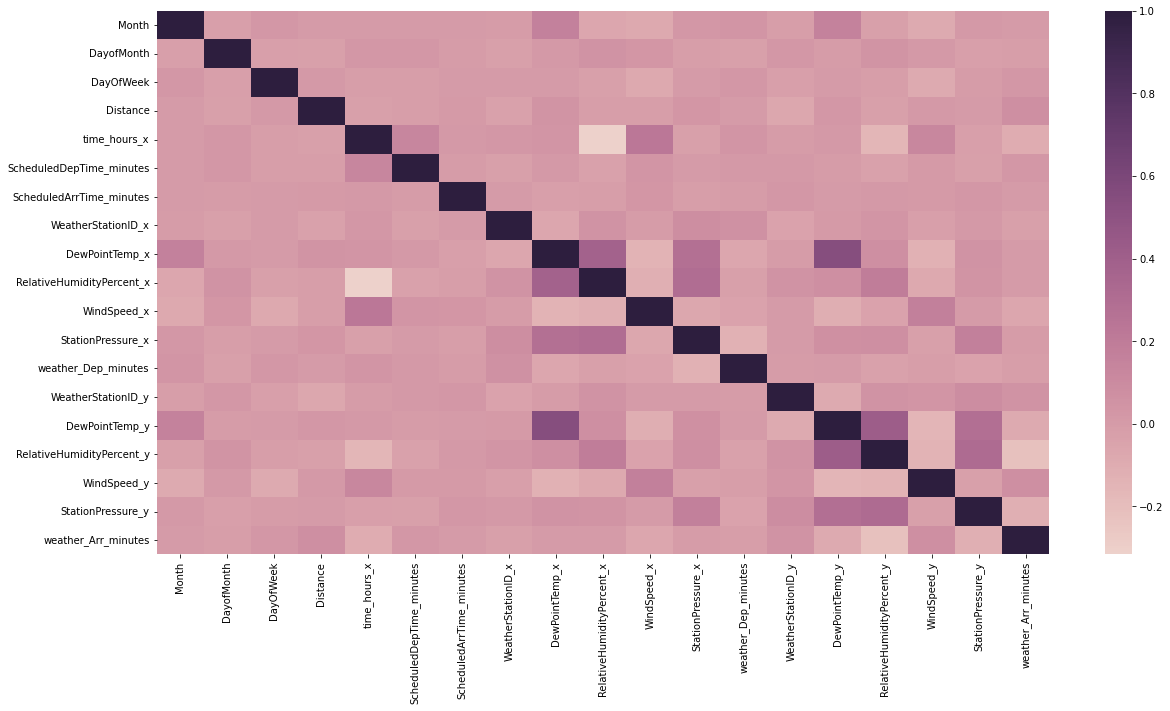

In [ ]:
plt.figure(figsize=(20, 10))
sns.heatmap(corr, cmap=sns.cubehelix_palette(as_cmap=True))
plt.show()

In [ ]:
df_cln_t.describe()

,Month,DayofMonth,DayOfWeek,Distance,time_hours_x,ScheduledDepTime_minutes,ScheduledArrTime_minutes,WeatherStationID_x,DewPointTemp_x,RelativeHumidityPercent_x,WindSpeed_x,StationPressure_x,weather_Dep_minutes,WeatherStationID_y,DewPointTemp_y,RelativeHumidityPercent_y,WindSpeed_y,StationPressure_y,weather_Arr_minutes
count,6566.000000,6566.000000,6566.000000,6566.000000,6566.000000,6566.000000,6566.000000,6566.000000,6566.000000,6566.000000,6566.000000,6566.000000,6566.000000,6566.000000,6566.000000,6566.000000,6566.000000,6566.000000,6566.000000
mean,7.261956,15.856381,3.916844,766.722662,12.199970,26.906183,28.850746,31144.631435,48.845720,58.200579,8.282973,28.657783,51.487664,31890.641486,48.606305,56.074931,8.235608,28.675449,44.952939
std,2.931392,8.864432,1.935778,528.835476,3.612967,17.868438,17.651668,32450.606247,17.810925,20.954086,4.888712,1.226270,5.646485,32829.181381,17.436361,19.815198,4.720304,1.201762,17.457783
min,3.000000,1.000000,1.000000,81.000000,5.000000,0.000000,0.000000,3017.000000,-9.000000,4.000000,0.000000,23.000000,0.000000,3017.000000,-9.000000,5.000000,0.000000,23.000000,0.000000
25%,3.000000,8.000000,2.000000,383.000000,9.000000,10.000000,14.000000,13739.000000,36.000000,44.000000,5.000000,29.000000,51.000000,13739.000000,36.000000,43.000000,5.000000,29.000000,51.000000
50%,7.000000,16.000000,4.000000,612.000000,12.000000,28.000000,29.000000,14739.000000,52.000000,59.000000,8.000000,29.000000,53.000000,14739.000000,52.000000,56.000000,8.000000,29.000000,53.000000
75%,9.000000,23.000000,6.000000,988.000000,15.000000,42.000000,45.000000,24127.000000,63.000000,74.000000,11.000000,29.000000,54.000000,24127.000000,62.000000,70.000000,11.000000,29.000000,54.000000
max,11.000000,31.000000,7.000000,4502.000000,23.000000,59.000000,59.000000,94870.000000,79.000000,100.000000,32.000000,30.000000,58.000000,94860.000000,82.000000,100.000000,29.000000,30.000000,58.000000


C:\Users\chandan\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:xlabel='weather_Arr_minutes'>

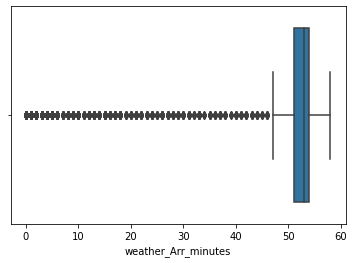

In [ ]:
sns.boxplot(df_cln_t['weather_Arr_minutes'])

In [ ]:
per25 = df_cln_t['Distance'].quantile(0.25)
per75 =  df_cln_t['Distance'].quantile(0.75)

iqr = per75 - per25

upper_limit = per75 + 1.5 * iqr
lower_limit = per25 - 1.5 * iqr

df_cln_t['Distance'] = np.where( df_cln_t['Distance'] > upper_limit, upper_limit,
                    np.where( df_cln_t['Distance'] < lower_limit, lower_limit,
                     df_cln_t['Distance'] ))

In [ ]:
per25 = df_cln_t['DewPointTemp_x'].quantile(0.25)
per75 =  df_cln_t['DewPointTemp_x'].quantile(0.75)

iqr = per75 - per25

upper_limit = per75 + 1.5 * iqr
lower_limit = per25 - 1.5 * iqr

df_cln_t['DewPointTemp_x'] = np.where( df_cln_t['DewPointTemp_x'] > upper_limit, upper_limit,
                    np.where( df_cln_t['DewPointTemp_x'] < lower_limit, lower_limit,
                     df_cln_t['DewPointTemp_x'] ))

In [ ]:
per25 = df_cln_t['WindSpeed_x'].quantile(0.25)
per75 =  df_cln_t['WindSpeed_x'].quantile(0.75)

iqr = per75 - per25

upper_limit = per75 + 1.5 * iqr
lower_limit = per25 - 1.5 * iqr

df_cln_t['WindSpeed_x'] = np.where( df_cln_t['WindSpeed_x'] > upper_limit, upper_limit,
                    np.where( df_cln_t['WindSpeed_x'] < lower_limit, lower_limit,
                     df_cln_t['WindSpeed_x'] ))

In [ ]:
per25 = df_cln_t['StationPressure_x'].quantile(0.25)
per75 =  df_cln_t['StationPressure_x'].quantile(0.75)

iqr = per75 - per25

upper_limit = per75 + 1.5 * iqr
lower_limit = per25 - 1.5 * iqr

df_cln_t['StationPressure_x'] = np.where( df_cln_t['StationPressure_x'] > upper_limit, upper_limit,
                    np.where( df_cln_t['StationPressure_x'] < lower_limit, lower_limit,
                     df_cln_t['StationPressure_x'] ))

In [ ]:
per25 = df_cln_t['weather_Dep_minutes'].quantile(0.25)
per75 =  df_cln_t['weather_Dep_minutes'].quantile(0.75)

iqr = per75 - per25

upper_limit = per75 + 1.5 * iqr
lower_limit = per25 - 1.5 * iqr

df_cln_t['weather_Dep_minutes'] = np.where( df_cln_t['weather_Dep_minutes'] > upper_limit, upper_limit,
                    np.where( df_cln_t['weather_Dep_minutes'] < lower_limit, lower_limit,
                     df_cln_t['weather_Dep_minutes'] ))

In [ ]:
per25 = df_cln_t['DewPointTemp_y'].quantile(0.25)
per75 =  df_cln_t['DewPointTemp_y'].quantile(0.75)

iqr = per75 - per25

upper_limit = per75 + 1.5 * iqr
lower_limit = per25 - 1.5 * iqr

df_cln_t['DewPointTemp_y'] = np.where( df_cln_t['DewPointTemp_y'] > upper_limit, upper_limit,
                    np.where( df_cln_t['DewPointTemp_y'] < lower_limit, lower_limit,
                     df_cln_t['DewPointTemp_y'] ))

In [ ]:
per25 = df_cln_t['WindSpeed_y'].quantile(0.25)
per75 =  df_cln_t['WindSpeed_y'].quantile(0.75)

iqr = per75 - per25

upper_limit = per75 + 1.5 * iqr
lower_limit = per25 - 1.5 * iqr

df_cln_t['WindSpeed_y'] = np.where( df_cln_t['WindSpeed_y'] > upper_limit, upper_limit,
                    np.where( df_cln_t['WindSpeed_y'] < lower_limit, lower_limit,
                     df_cln_t['WindSpeed_y'] ))

In [ ]:
per25 = df_cln_t['StationPressure_y'].quantile(0.25)
per75 =  df_cln_t['StationPressure_y'].quantile(0.75)

iqr = per75 - per25

upper_limit = per75 + 1.5 * iqr
lower_limit = per25 - 1.5 * iqr

df_cln_t['StationPressure_y'] = np.where( df_cln_t['StationPressure_y'] > upper_limit, upper_limit,
                    np.where( df_cln_t['StationPressure_y'] < lower_limit, lower_limit,
                     df_cln_t['StationPressure_y'] ))

In [ ]:
per25 = df_cln_t['weather_Arr_minutes'].quantile(0.25)
per75 =  df_cln_t['weather_Arr_minutes'].quantile(0.75)

iqr = per75 - per25

upper_limit = per75 + 1.5 * iqr
lower_limit = per25 - 1.5 * iqr

df_cln_t['weather_Arr_minutes'] = np.where( df_cln_t['weather_Arr_minutes'] > upper_limit, upper_limit,
                    np.where( df_cln_t['weather_Arr_minutes'] < lower_limit, lower_limit,
                     df_cln_t['weather_Arr_minutes'] ))

In [ ]:
train_t = df_cln_t.copy()

In [ ]:
train_t.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 6566 entries, 0 to 6565
Data columns (total 27 columns):
 #   Column                     Non-Null Count  Dtype  
---  ------                     --------------  -----  
 0   Month                      6566 non-null   int64  
 1   DayofMonth                 6566 non-null   int64  
 2   DayOfWeek                  6566 non-null   int64  
 3   Origin                     6566 non-null   object 
 4   Destination                6566 non-null   object 
 5   Distance                   6566 non-null   float64
 6   time_hours_x               6566 non-null   int64  
 7   ScheduledDepTime_minutes   6566 non-null   int32  
 8   ScheduledArrTime_minutes   6566 non-null   int32  
 9   WeatherStationID_x         6566 non-null   int32  
 10  SkyConditions_x            6566 non-null   object 
 11  Visibility_x               6566 non-null   object 
 12  DewPointTemp_x             6566 non-null   float64
 13  RelativeHumidityPercent_x  6566 non-null   int32

In [ ]:
train_t['Origin'] = le.fit_transform(train_t['Origin'])
train_t['Destination'] = le.fit_transform(train_t['Destination'])

In [ ]:
train_t['SkyConditions_x'] = le.fit_transform(train_t['SkyConditions_x'])
train_t['Visibility_x'] = le.fit_transform(train_t['Visibility_x'])
train_t['WindDirection_x'] = le.fit_transform(train_t['WindDirection_x'])

In [ ]:
train_t['SkyConditions_y'] = le.fit_transform(train_t['SkyConditions_y'])
train_t['Visibility_y'] = le.fit_transform(train_t['Visibility_y'])
train_t['WindDirection_y'] = le.fit_transform(train_t['WindDirection_y'])

In [ ]:
train_t['WeatherStationID_x'] = le.fit_transform(train_t['WeatherStationID_x'])
train_t['WeatherStationID_y'] = le.fit_transform(train_t['WeatherStationID_y'])


In [ ]:
train_t['Distance'] = train_t['Distance'].astype(int)

In [ ]:
train_t['DewPointTemp_x'] = train_t['DewPointTemp_x'].astype(int)
train_t['RelativeHumidityPercent_x'] = train_t['RelativeHumidityPercent_x'].astype(int)
train_t['WindSpeed_x'] = train_t['WindSpeed_x'].astype(int)
train_t['StationPressure_x'] = train_t['StationPressure_x'].astype(int)
train_t['weather_Dep_minutes'] = train_t['weather_Dep_minutes'].astype(int)
train_t['DewPointTemp_y'] = train_t['DewPointTemp_y'].astype(int)
train_t['RelativeHumidityPercent_y'] = train_t['RelativeHumidityPercent_y'].astype(int)
train_t['WindSpeed_y'] = train_t['WindSpeed_y'].astype(int)
train_t['StationPressure_y'] = train_t['StationPressure_y'].astype(int)
train_t['weather_Arr_minutes'] = train_t['weather_Arr_minutes'].astype(int)


In [ ]:
train_t.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 6566 entries, 0 to 6565
Data columns (total 27 columns):
 #   Column                     Non-Null Count  Dtype
---  ------                     --------------  -----
 0   Month                      6566 non-null   int64
 1   DayofMonth                 6566 non-null   int64
 2   DayOfWeek                  6566 non-null   int64
 3   Origin                     6566 non-null   int32
 4   Destination                6566 non-null   int32
 5   Distance                   6566 non-null   int32
 6   time_hours_x               6566 non-null   int64
 7   ScheduledDepTime_minutes   6566 non-null   int32
 8   ScheduledArrTime_minutes   6566 non-null   int32
 9   WeatherStationID_x         6566 non-null   int64
 10  SkyConditions_x            6566 non-null   int32
 11  Visibility_x               6566 non-null   int32
 12  DewPointTemp_x             6566 non-null   int32
 13  RelativeHumidityPercent_x  6566 non-null   int32
 14  WindSpeed_x             

In [ ]:
train_t.drop(['Origin', 'Destination'], axis = 1, inplace = True)

In [ ]:
train_t

,Month,DayofMonth,DayOfWeek,Distance,time_hours_x,ScheduledDepTime_minutes,ScheduledArrTime_minutes,WeatherStationID_x,SkyConditions_x,Visibility_x,...,weather_Dep_minutes,WeatherStationID_y,SkyConditions_y,Visibility_y,DewPointTemp_y,RelativeHumidityPercent_y,WindSpeed_y,WindDirection_y,StationPressure_y,weather_Arr_minutes
0,9,12,1,616,15,16,56,0,1680,8,...,53,172,557,18,59,66,7,15,29,46
1,11,14,1,278,13,0,15,44,541,8,...,54,82,1841,9,26,22,13,34,29,51
2,9,28,3,239,11,40,44,187,574,8,...,51,40,2290,9,60,56,4,2,29,54
3,11,18,5,515,11,20,2,5,574,8,...,53,189,514,9,15,50,10,20,29,52
4,7,5,2,155,6,30,33,182,1882,13,...,56,135,1854,8,57,84,4,13,29,50
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
6561,11,21,1,1895,12,10,12,134,1609,8,...,50,82,1733,18,37,61,3,37,29,51
6562,11,25,5,867,17,17,38,208,2743,4,...,46,85,1841,9,12,45,7,23,29,54
6563,3,26,6,967,12,10,25,13,1899,16,...,53,182,268,9,33,61,8,6,29,54
6564,9,21,3,298,16,50,13,151,1371,8,...,49,146,999,9,30,31,6,32,29,55


In [ ]:
test_preds_t = xg.predict(train_t)

In [ ]:
test_preds_t.shape

(6566,)

In [ ]:
np.unique(test_preds_t)

array([0, 1])

In [ ]:
test_preds_t = np.where(test_preds_t==0,1,2)

In [ ]:
test_preds_t

array([2, 2, 2, ..., 2, 2, 2])

In [ ]:
test_preds_t = pd.DataFrame(data = test_preds_t,  columns = ['FlightDelayStatus'])

In [ ]:
test_preds_t.value_counts()

FlightDelayStatus
2                    5537
1                    1029
dtype: int64

In [ ]:
sample = pd.read_csv('ProblemStatement_Data&Instructions-1616503373207/InputFIles_Tool/samplesubmission.csv')

In [ ]:
sample

,FlightNumber,FlightDelayStatus
0,DEN_XNA_62349,2
1,RIC_EWR_87213,2
2,IAD_GSO_86576,2
3,SAV_CVG_87264,2
4,SBP_LAX_68158,2
...,...,...
6561,LAX_EWR_82392,2
6562,ORD_BOS_71467,2
6563,MCI_BWI_101601,2
6564,SLC_COD_68517,2


In [ ]:
sample = sample.loc[:, ['FlightNumber']]

In [ ]:
sample

,FlightNumber
0,DEN_XNA_62349
1,RIC_EWR_87213
2,IAD_GSO_86576
3,SAV_CVG_87264
4,SBP_LAX_68158
...,...
6561,LAX_EWR_82392
6562,ORD_BOS_71467
6563,MCI_BWI_101601
6564,SLC_COD_68517


In [ ]:
test_preds_t

,FlightDelayStatus
0,2
1,2
2,2
3,2
4,2
...,...
6561,2
6562,2
6563,2
6564,2


In [ ]:
xg_prediction = sample.join(test_preds_t)

In [ ]:
xg_prediction['FlightDelayStatus'].value_counts()

2    5537
1    1029
Name: FlightDelayStatus, dtype: int64

In [ ]:
xg_prediction.to_csv('prediction_9.csv', index = False)

In [ ]:
xg_prediction.isnull().sum()

FlightNumber         0
FlightDelayStatus    0
dtype: int64